# Predicting Popular Recipes and High Website Traffic on Tasty Bytes

Our data science team at Tasty Recipe has been tasked with developing a model that accurately predicts which recipes will be popular 80% of the time, and minimizing the occurrence of showcasing unpopular recipes on Tasty Bytes homepage.

More specifically, the challenge is divided into two objectives:
- Predict which recipes displayed on the website homepage will lead to high traffic
- Correctly predict high traffic recipes 80% of the time

The aim of the following project is to leverage the power of machine learning to accurately predict high traffic on our website. We will begin by conducting quality control and validation on the available historical data, followed by exploratory data analysis to gain deeper insights into the data. To handle any missing data, we will perform thorough data pre-processing and cleaning to ensure the reliability and suitability of the data for analysis.

Our next step will be to establish a baseline model using a simple algorithm and evaluate its performance compared to random guessing. Then, we will develop a more advanced model to improve the prediction accuracy. We will define clear business metrics to evaluate the performance of our models, and present our findings and conclusions with clear recommendations and next steps for Tasty Bytes data science team to follow. 

![TastyBytes](TastyBytes.jpeg)

**About Tasty Bytes**
_Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted inspiration so we decided to provide it. We started life as a search engine for recipes, helping people to find ways to use up the limited supplies they had at home.
Now, over two years on, we are a fully fledged business. For a monthly subscription we will put together a full meal plan to ensure you and your family are getting a healthy, balanced diet whatever your budget._
(image courtesy of logo.designcrowd.com)

## _Task List_

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   Has validated all variables and where necessary has performed cleaning tasks to result in analysis-ready data [DONE]

- Exploratory Analysis:  
	- Has created at least two different visualizations of single variables (e.g. histogram, bar chart, single boxplot) [DONE]
	- Has created at least one visualization including two or more variables (e.g. scatterplot, filled bar chart, multiple boxplots) [DONE]

- Model Fitting 
	- Correctly identified the type of problem (regression, classification or clustering) [DONE]
	- Has selected and fitted a model for that problem to be used as a baseline [DONE]
	- Has selected and fitted a comparison model for the problem that they were provided [DONE]
	- Code to fit the baseline and comparison models [DONE]
	
- Model Evaluation [DONE]
	- Compared the performance of the two models/approaches using any method appropriate to the type of problem [DONE]
	- Has described what the model comparison shows about the selected approaches [DONE]


- Business Focus [DONE]
	- Has described at least one of the business goals of the project [DONE]
	- Has explained how their work has addressed the business problem [DONE]
	- Has provided at least one recommendation for future action to be taken based on the outcome of the work done [DONE]


- Business Metrics [DONE]
	- Has defined a KPI to compare model performance to business criteria in the problem [DONE]
	- Has compared the performance of the two models/approaches using the defined KPI [DONE]	

- **Communication []**
	- **For each analysis step, has provided a written explanation of their findings and/or reasoning for selecting approaches [DONE]**
	- **Has delivered a verbal presentation addressing the business goals, outcomes and recommendations []**




# Summary
#### 1) Introduction
#### 2) Data Validation 
#### 3) Exploratory Analysis  
#### 4) Model Development
#### 5) Model Evaluation
#### 6) Business Metrics
#### 7) Conclusions and Recommenations

---
# 1. Introduction 
## Business Question: Can we predict with 80% accuracy which recipes will generate high traffic?

Our dataset includes a categorical "high_traffic" column and columns with food recipe specifics such as calories, carbohydrate and sugar content in grams, recipe category, and serving size.

We will aim to build a binary classification model that predicts whether a recipe will generate high web traffic or not.

- Target variable (dependent variable): 'high_traffic'
- Features (predictors): food recipe characteristics

We will evaluate the dataset's quality, use cleaning and preparation techniques to ensure data quality and analysis readiness. We will perform exploratory analysis to identify trends and insights to better understand our data.

To evaluate the model's effectiveness, we will create a baseline prediction algorithm and compare our model's performance to random guessing. We will improve the model's performance using more sophisticated algorithms and feature selection techniques, then apply appropriate business metrics to interpret the final models and draw our conclusions. 

---
# 2. Data Validation

In this section, we will validate the quality and accuracy of the data to ensure its readiness for analysis. We will perform a comprehensive examination of each column in the data, checking for any missing or incorrect values (outliers, etc). This will be followed by data cleaning steps to correct and impute missing data.

Our goal in this section is to provide a solid data foundation by ensuring their reliability and accuracy, which will enable us to make meaningful predictions and achieve our project objectives.


In [1]:
# Imports core Python libraries
import pandas as pd
import numpy as np
from pathlib import Path

# visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# statistical library for p-values calculation
from scipy import stats

# Machine Learning libraries for fast-track test 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#set random set for reproductability 
seed = 42 

## 2.1 Load the data, and perform first obsvervations

In [2]:
# Load the dataset into a Pandas Dataframe
recipe_df = pd.read_csv(Path("recipe_site_traffic_2212.csv"))

# Review the DataFrame
recipe_df.head()

recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN

In [3]:
# define recipe as index for the dataframa and rename and sort index
recipe_df = recipe_df.set_index("recipe")
recipe_df.index.name = "recipe_id"
recipe_df = recipe_df.sort_index()

In [4]:
# examine the statistical distribution of the values within the dataframe columns
recipe_df.describe()

calories  carbohydrate       sugar     protein
count   895.000000    895.000000  895.000000  895.000000
mean    435.939196     35.069676    9.046547   24.149296
std     453.020997     43.949032   14.679176   36.369739
min       0.140000      0.030000    0.010000    0.000000
25%     110.430000      8.375000    1.690000    3.195000
50%     288.550000     21.480000    4.550000   10.800000
75%     597.650000     44.965000    9.800000   30.200000
max    3633.160000    530.420000  148.750000  363.360000

In [5]:
# check the datatypes of the column and count of missing values for each column
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


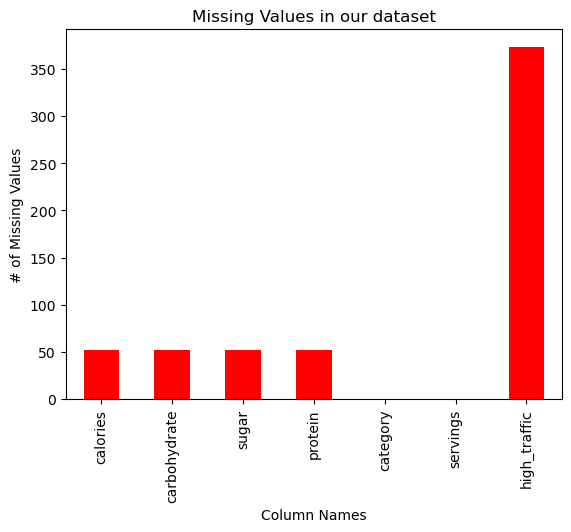

In [6]:
# check for missing values with a bar chart
recipe_df.isnull().sum().plot(kind='bar', color = 'red')

# Add a title and axis labels
plt.title('Missing Values in our dataset')
plt.xlabel('Column Names')
plt.ylabel('# of Missing Values')

plt.show()

The dataset consists of 7 columns and 947 rows, including numerical (float64) and categorical (object) data types. 
- The 4 numerical columns have 52 missing values (approx. 5%) 
- 2 of the categorical columns do not have any missing values at all : 'category' and 'servings'. 
- The 'high_traffic' categorical column has 373 missing values (approx. 39%).

#### Histograms of the numerical data columns

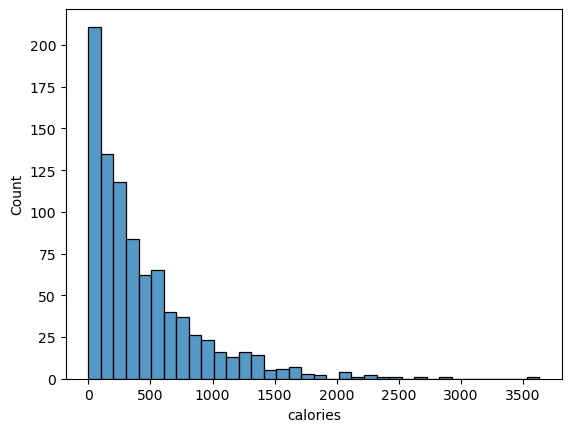

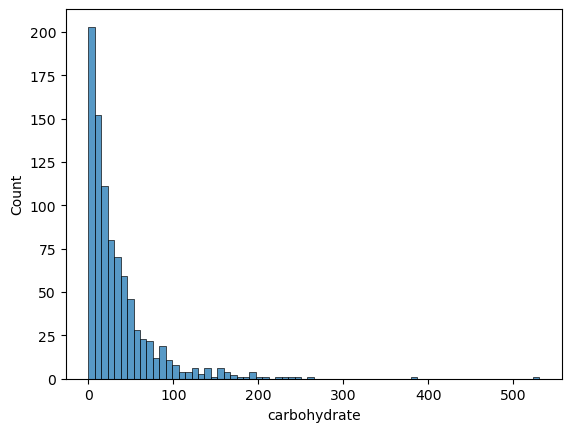

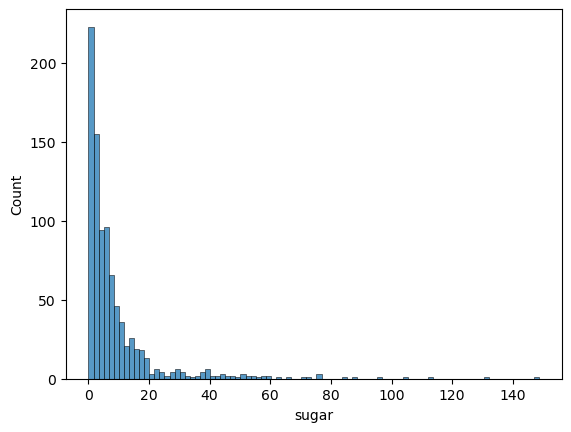

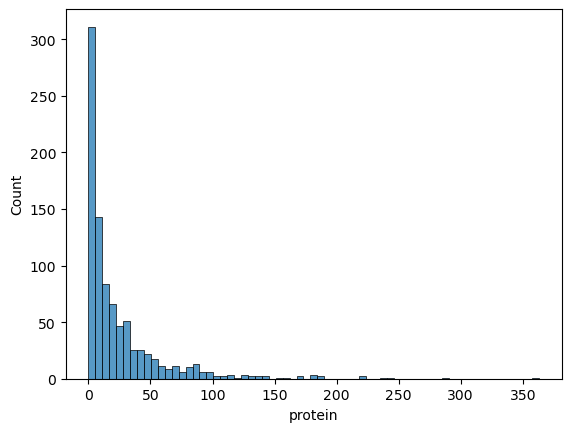

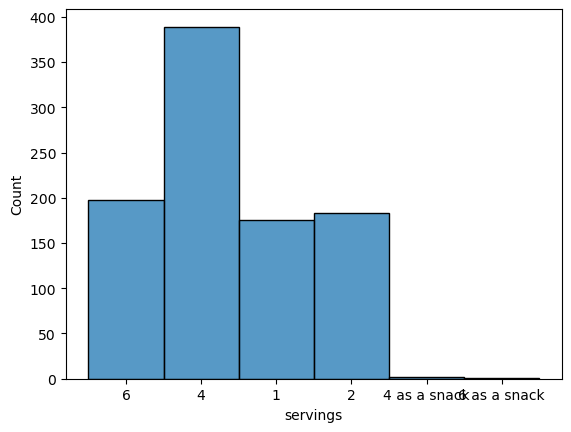

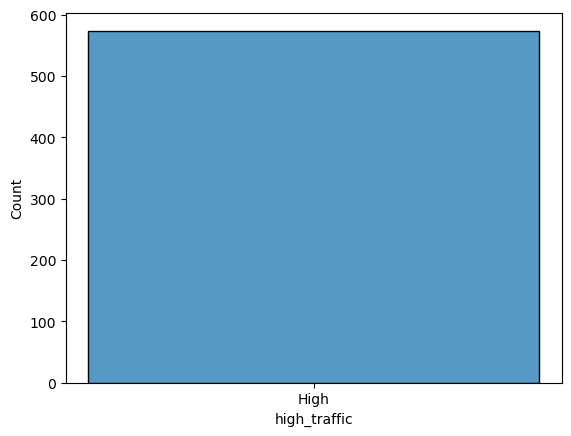

In [7]:
# Identify the numerical columns
num_columns =('calories','carbohydrate','sugar','protein','servings','high_traffic')

# Plot an histogram for each one of the numerical columns
for column in num_columns:
    plt.figure()
    sns.histplot(data=recipe_df, x=column)
    plt.show()

#### Pie chart of the categorical columns

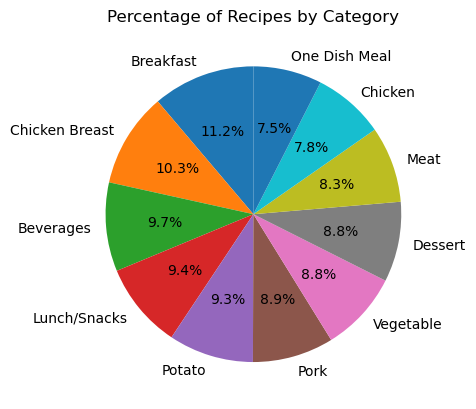

In [8]:
# Count the occurrences of each category
category_counts = recipe_df['category'].value_counts()

# Plot the pie chart
plt.pie(category_counts, labels=category_counts.index, startangle=90, autopct='%1.1f%%')

# Set the title
plt.title("Percentage of Recipes by Category")

# Show the plot
plt.show()

### First Observations
- The columns in the dataset include: calories, macro-nutrient content (protein, sugar and carbs), number of servings, and category.
- The dataset contains missing values, with 5.5% of the macro-nutrient data (protein and carbs in grams) missing and 39.3% of the Traffic data missing.
- Despite the limited information on macro-nutrients (carb, sugar, and protein only), we have the information on total calories, which may allow us to estimate fat content.
- There are no negative values in the macro-nutrient columns, and it is reasonable to expect that these values can start from zero, as it is common to see recipes with low carb content or low sugar.
- The data provides more than 900 observations, making it suitable for a machine learning workflow.

### Assumptions and path forward workflow: 
- To interpret the traffic data, we will use the 'high_traffic' column, assuming that a value of 'High' indicates confirmed high web traffic when a particular recipe was published on the Tasty Bytes website homepage. Any non-data values in the 'high_traffic' column will be categorized as 'Other'. Although we lack information on whether 'Other' corresponds to high or low traffic, it is reasonable to assume that the 'High' labeled recipes are the most popular, given the context."

- To handle the skewed distribution and outliers in the data, we can use various preprocessing techniques such as scaling, transforming, or removing outliers before building a predictive model.
- The 'category' column is comprised of 11 unique labels, well-balanced, with each label representing between 7.5% and 11.2% of the available observations in the historical dataset. We will merge the instances with "Chicken Breast" with "Chicken" to simplify the categories. 

**--> Based on the above asumptions, our historical dataset contains 574 cases of 'High' traffic and over 400 cases of 'Other' traffic, making it suitable for performning binary classification using machine learning.**



--- 
## 2.2 Data Preprocessing and QC
Before building our binary classification model to predict instances of high traffic for Tasty Bytes recipes, we need to ensure the data is reliable and suitable for analysis. We will preprocess and perform quality control on each column using the following steps:

- Identify and address missing or invalid values in the column.
- Impute missing values for columns with a high proportion of missing data using an appropriate imputation technique.
- Transform the data to meet the assumptions necessary for statistical analysis, such as normality, linearity, and equal variance.
- Identify and handle outliers using appropriate methods, such as removal or transformation, to avoid bias in the data.

### Handling the non-data values in the 'high_traffic' column.
Before building our binary classification model to predict instances of high traffic for Tasty Bytes recipes, we need to handle the non-data values in the 'high_traffic' column.

We will assign a value of 1 to all cases labeled as 'High', indicating that these recipes generated high traffic.
For missing values labeled as 'Other', we will encode them as 0. These cases correspond to recipes for which the actual traffic is unknown and could be either high or low.
Our goal is to build a highly accurate binary classification model that predicts high traffic for Tasty Bytes recipes using the following values:

- 0: Unknown traffic (could be high or low)
- 1: High traffic.

In [9]:
qc_recipe_df = recipe_df

# Replace all null values in column 'High_Traffic' with 0
qc_recipe_df['high_traffic'].fillna(0, inplace=True)

# Replace all 'High' values in column 'High_Traffic' with 1
qc_recipe_df['high_traffic'] = qc_recipe_df['high_traffic'].replace('High', 1)

### Columns Renaming 

In [10]:
# Displaying the unique values of the column "category". 
qc_recipe_df['category'].unique()


array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [11]:
# naming best pratice: replace "Lunch/Snacks" value in "category" column by "Lunch_Snacks" and replace spaces and slashes by "_" 
qc_recipe_df['category'] = qc_recipe_df['category'].replace('Lunch/Snacks', 'Lunch_Snacks')
qc_recipe_df['category'] = qc_recipe_df['category'].replace('One Dish Meal', 'One_Dish_Meal')

# merging together categories that describe the same category of food
qc_recipe_df['category'] = qc_recipe_df['category'].replace('Chicken Breast', 'Chicken')
#qc_recipe_df['category'] = qc_recipe_df['category'].replace('Potato', 'Vegetable')

In [12]:
# check value of servings 
qc_recipe_df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

The 'servings' column appear as being a categorical one. Nonetheless most of its values are numerical, and some of them that are text could be easily converted to a number. For instance converting '4 as a snack' as 4 (number four). 

But what does '4 as a snack' really means?

#### Understanding what "as a snack" means in the servings size

In [13]:
# let's understand what are the '6' servings and '6 as a snack' to understand better what '6 as a snack' means
serving6mean_df =  qc_recipe_df.loc[qc_recipe_df['servings']=='6'][['calories','carbohydrate','sugar','protein']].mean()
serving4mean_df =  qc_recipe_df.loc[qc_recipe_df['servings']=='4'][['calories','carbohydrate','sugar','protein']].mean()
serving6snack_df=  qc_recipe_df.loc[qc_recipe_df['servings']=='6 as a snack']
serving4snack_df=  qc_recipe_df.loc[qc_recipe_df['servings']=='4 as a snack']

In [14]:
pd.options.display.float_format = '{:,.2f}'.format
display(serving6snack_df)
display(serving6mean_df)
display(serving4snack_df)
display(serving4mean_df)

calories  carbohydrate  sugar  protein      category      servings  \
recipe_id                                                                       
549        1,440.69         30.59   5.78    30.63  Lunch_Snacks  6 as a snack   

           high_traffic  
recipe_id                
549                   1

calories       419.13
carbohydrate    32.38
sugar            8.64
protein         24.60
dtype: float64

calories  carbohydrate  sugar  protein      category      servings  \
recipe_id                                                                       
452        1,542.53         14.73   5.71    29.92  Lunch_Snacks  4 as a snack   
736          513.75         65.87  18.63    18.39  Lunch_Snacks  4 as a snack   

           high_traffic  
recipe_id                
452                   1  
736                   0

calories       423.05
carbohydrate    36.08
sugar            9.15
protein         22.54
dtype: float64

We found only a few entries with the 'as a snack' suffix in the 'servings' column. Based on our analysis of the corresponding calorie count, it seems reasonable to assume that these entries represent a single serving with an estimated calorie count between 125 and 400. The macro-nutrient content (carb, sugar, protein) is also consistent with the averages observed in other entries with 4 or 6 servings. 

**--> Therefore, we will remove the 'as a snack' suffix and convert the 'servings' column to numerical.**

In [15]:
# lets remove ' as a snack' string from the column values for 'servings'
qc_recipe_df["servings"] = qc_recipe_df["servings"].str.replace(" as a snack", "")

# make sure that the values in the 'servings' column are numeric
qc_recipe_df["servings"] = pd.to_numeric(qc_recipe_df["servings"], errors='coerce')

qc_recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    int64  
 6   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 59.2+ KB


### Are the numerical features statistically significant? 
We will perform a statistical test to determine the significance of the numerical features.

In [16]:
pvalue_df = qc_recipe_df.dropna()

# Store the names of the columns in a list
column_names = ['calories','carbohydrate','sugar','protein','servings']

# Define features set and target vector 
X_pv = pvalue_df[column_names]
#X = pvalue_df.drop(columns=['high_traffic','category']).astype(float)
y_pv = pvalue_df['high_traffic'].astype(float)

# Loop through each column
for column in column_names:
    # Get the p-value for the column
    p_value = stats.pearsonr(pvalue_df[column], pvalue_df['high_traffic'])[1]
    
    # Print the column name and its corresponding p-value
    print(f"{column}: {p_value}")

calories: 0.02606598207196364
carbohydrate: 0.015444390210209439
sugar: 0.023847573817121482
protein: 0.18275269423422433
servings: 0.19633181179526332


### Rejecting the null hypothesis for 'calories', 'carbohydate' and 'sugar'

For calories, carb and sugar, the p-value are less than 0.05, which means that the likelihood of the result being due to chance is low, and that the null hypothesis that there is no relationship between the feature and the target vector can therefore be rejected. 

In other words, the results of the statistical tests for the features calories, carb, and sugar indicate a strong relationship between these variables and the target vector 'high_traffic'. 

**'calories', 'carbohydate' and 'sugar' are statistically significant, and we can expect them play a role in predicting the value of 'high_traffic'.** 

### Quick Fast Track Predictive Model - Logistic Regression
To build a fast-track model, we have selected only the statistically significant predictors indentified so far : 'calories', 'carbohydrates', and 'sugar'. We will use these features to train a simple classification model using logistic regression, and assess its accuracy. The aim is to determine whether the model can outperform random guessing; even a slight improvement above random guessing (50%) will be a good indication of the predictive power of those chosen predictors. 

In [17]:
fast_track = qc_recipe_df.dropna()

# Load your data into X and y
X_ft = fast_track[["calories","carbohydrate","sugar"]] 
y_ft = fast_track[["high_traffic"]]

# Split the data into training and testing sets
X_ft_train, X_ft_test, y_ft_train, y_ft_test = train_test_split(X_ft, y_ft, random_state=42)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_ft_train, y_ft_train)

# Make predictions on the testing set
y_ft_pred = lr.predict(X_ft_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_ft_test, y_ft_pred)
print("Accuracy:", accuracy)

Accuracy: 0.59375


/Users/adriencaudron/miniforge3/envs/dev310/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The fast-track model demonstrates an accuracy of nearly 60%, which is a promising sign for the predictive power of our chosen predictors in accurately forecasting the target variable, high_traffic.

---
# 3. Exploratory Data Analysis
In this section, we will include different graphics and visualization displaying the relationship between our variables. Through this exploratory analysis, we aim to uncover important insights and patterns in the data.

In [18]:
def display_boxplots(df, id_vars, value_vars, value_name, var_name, aspect_ratio):
    # Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
    melted_df = df.melt(id_vars=id_vars, value_vars=value_vars, value_name=value_name, var_name=var_name)

    # Use catplot to create boxplots
    sns.catplot(data=melted_df, x=value_name, y=var_name, hue=id_vars[0], kind='box', height=10, aspect=aspect_ratio)

    # Show the plot
    plt.show()

In [19]:
#create new columns for the food specs (calories, carbohydrate, sugar, protein) per serving
qc_recipe_df['calories_per_serving'] = qc_recipe_df['calories'] / qc_recipe_df['servings']
qc_recipe_df['carbohydrate_per_serving'] = qc_recipe_df['carbohydrate'] / qc_recipe_df['servings']
qc_recipe_df['sugar_per_serving'] = qc_recipe_df['sugar'] / qc_recipe_df['servings']
qc_recipe_df['protein_per_serving'] = qc_recipe_df['protein'] / qc_recipe_df['servings']

#### Check relationship between "high_traffic" and "category"

/Users/adriencaudron/miniforge3/envs/dev310/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adriencaudron/miniforge3/envs/dev310/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adriencaudron/miniforge3/envs/dev310/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adriencaudron/miniforge3/envs/dev310/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

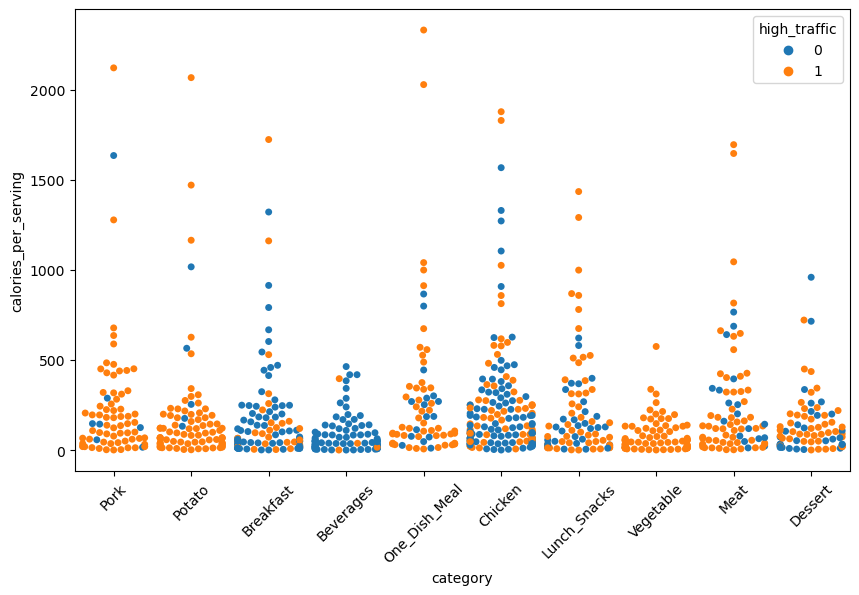

In [20]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create violin plots for column 'sugar' across different categories
#sns.violinplot(data=qc_recipe_df, x="category", y="calories_per_serving", inner="stick")

# create swarm plot
sns.swarmplot(data=qc_recipe_df, x="category", y="calories_per_serving", hue = "high_traffic")

# Rotate the x tick labels
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Show the plot
plt.show()

The swarm plot above shows us 2 things:

- there could be outliers in some categories: over 2000 calories per serving seems indeed quite high for just one serving (a pizza slice for reference is aprox 500 calories)
- some categories seems to generate high-traffic, like vegetable, potato, pork (orange color dominant in the graph), while other are generating low traffic: beverages, breakfast (blue color dominant).

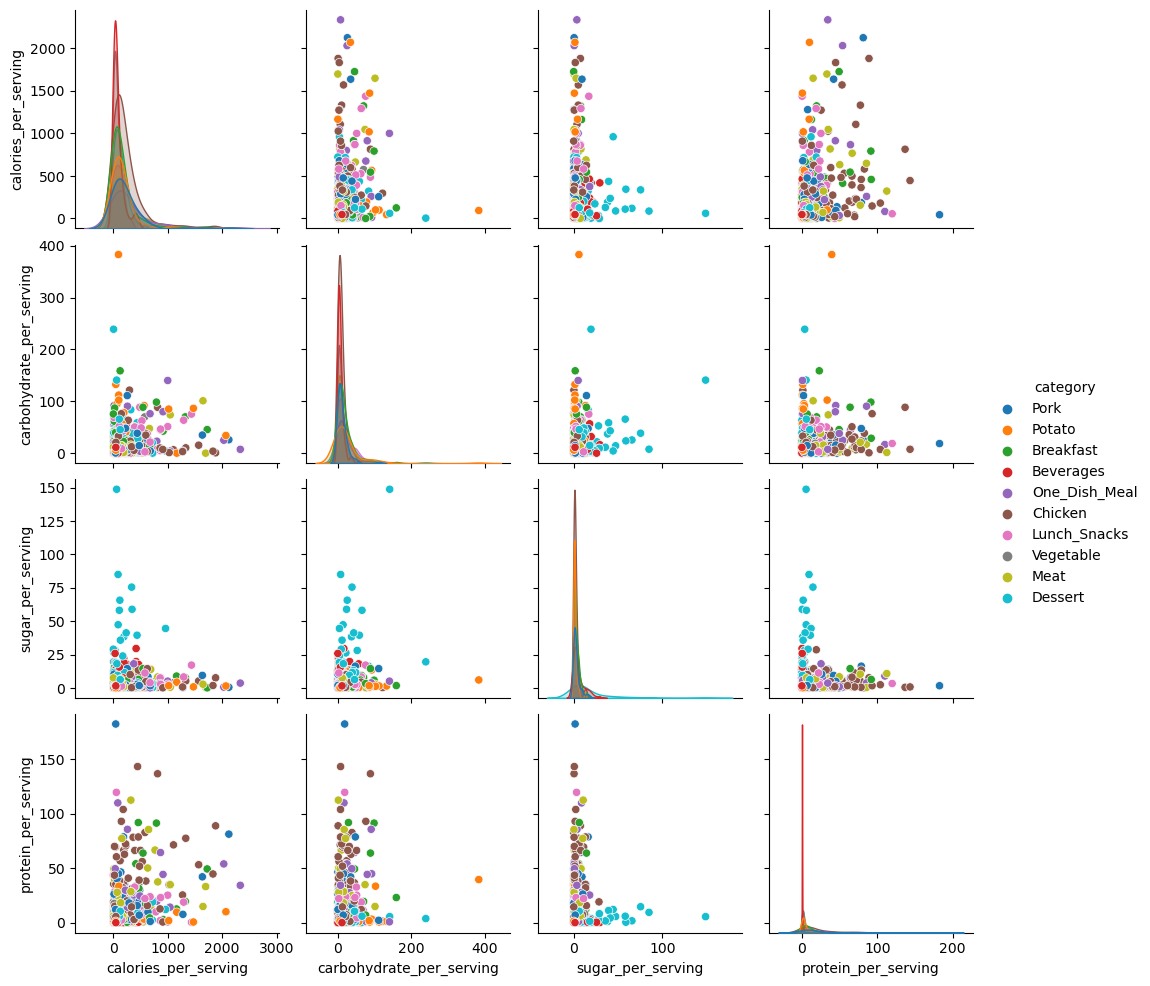

In [21]:
sns.pairplot(data=qc_recipe_df, vars=["calories_per_serving","carbohydrate_per_serving","sugar_per_serving","protein_per_serving"], hue="category")

We don't observe any linear relationships between our variables. 

In [22]:
for col in ['calories_per_serving','protein_per_serving','carbohydrate_per_serving','sugar_per_serving']: 
    display(qc_recipe_df[col].describe())

count     895.00
mean      191.21
std       290.15
min         0.07
25%        33.69
50%        93.57
75%       225.24
max     2,332.32
Name: calories_per_serving, dtype: float64

count   895.00
mean     10.45
std      18.92
min       0.00
25%       0.98
50%       3.34
75%      11.12
max     182.63
Name: protein_per_serving, dtype: float64

count   895.00
mean     14.90
std      24.89
min       0.01
25%       2.48
50%       6.94
75%      16.39
max     383.06
Name: carbohydrate_per_serving, dtype: float64

count   895.00
mean      3.83
std       8.74
min       0.00
25%       0.54
50%       1.40
75%       3.77
max     148.75
Name: sugar_per_serving, dtype: float64

#### There are some outliers within some of the features. Let's dive deeper into this

Text(0.5, 1.0, 'protein_per_serving')

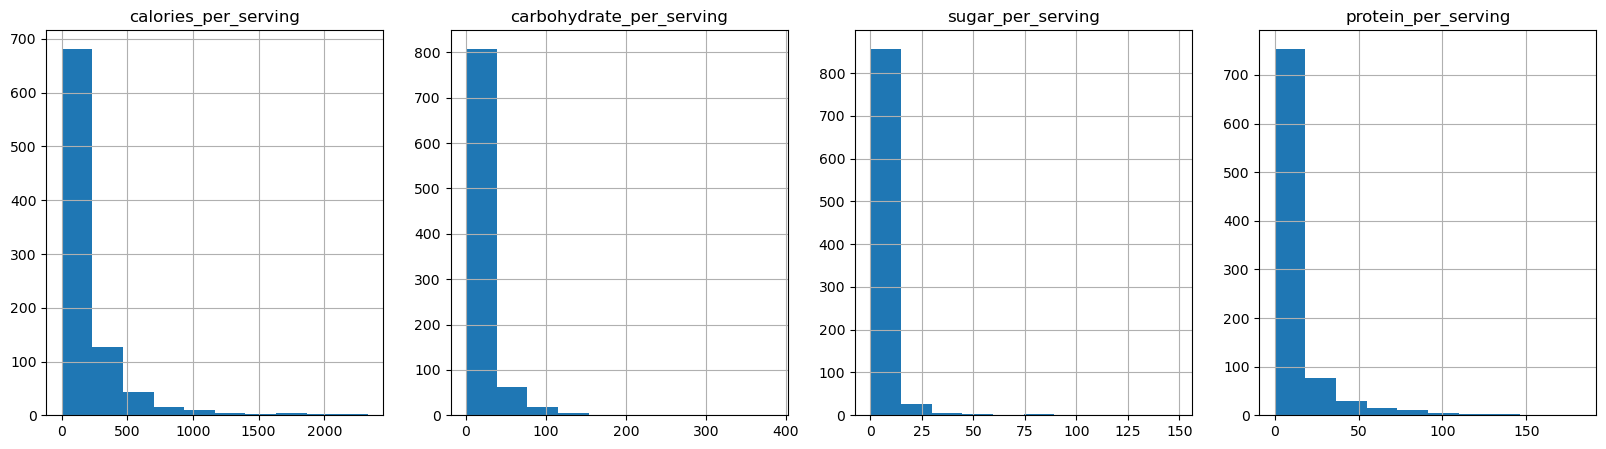

In [23]:
# create the subplots
fig, axs = plt.subplots(1, 4, figsize=(20,5))

# plot the histograms
qc_recipe_df["calories_per_serving"].hist(ax=axs[0])
qc_recipe_df["carbohydrate_per_serving"].hist(ax=axs[1])
qc_recipe_df["sugar_per_serving"].hist(ax=axs[2])
qc_recipe_df["protein_per_serving"].hist(ax=axs[3])

# Add titles to the subplots
axs[0].set_title("calories_per_serving")
axs[1].set_title("carbohydrate_per_serving")
axs[2].set_title("sugar_per_serving")
axs[3].set_title("protein_per_serving")


/var/folders/x7/v571_3t12ddffkm6dh_29_tr0000gn/T/ipykernel_5716/1049600889.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_df = df.melt(id_vars=id_vars, value_vars=value_vars, value_name=value_name, var_name=var_name)


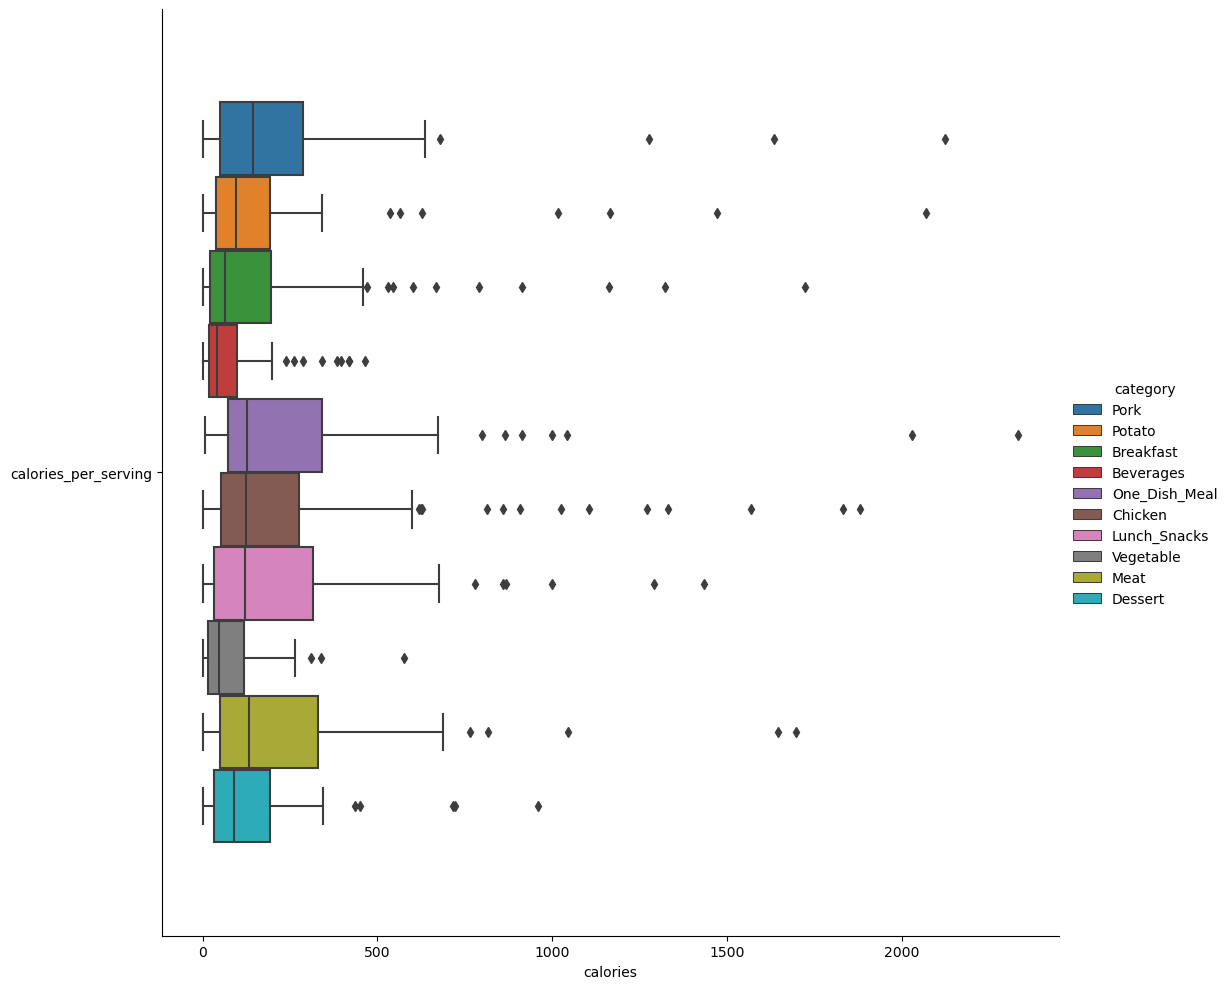

In [24]:
display_boxplots(qc_recipe_df, id_vars=['category','servings'], value_vars=['calories_per_serving'], value_name='calories', var_name='', aspect_ratio=1.1)

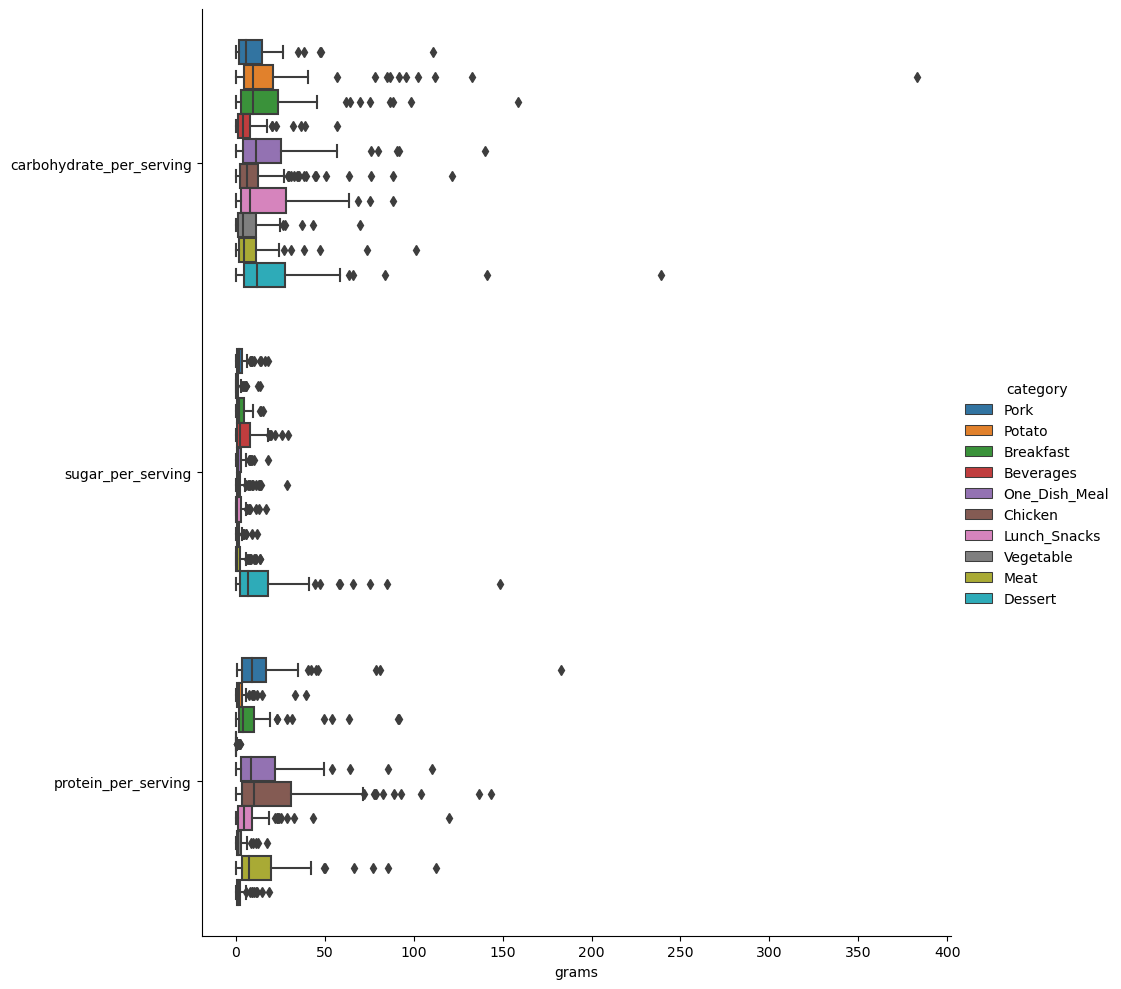

In [25]:
display_boxplots(qc_recipe_df, id_vars=['category','servings'], value_vars=['carbohydrate_per_serving','sugar_per_serving','protein_per_serving'], value_name='grams', var_name='', aspect_ratio=1)

### Let's identify those outliers 

In [26]:
def id_outlier(food_spec,qa1,qa3):
    # Calculate the interquartile range (IQR) of the 'calories' column
    q1, q3 = qc_recipe_df[food_spec].quantile([qa1,qa3])
    iqr = q3 - q1
    
    # Identify the outliers using the IQR and the lower and upper bounds.
    lower_bound = 0 #q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = qc_recipe_df[(qc_recipe_df[food_spec] < lower_bound) | (qc_recipe_df[food_spec] > upper_bound)]

    return outliers


In [27]:
for col in ['calories_per_serving','protein_per_serving','carbohydrate_per_serving','sugar_per_serving']: 
    display(id_outlier(col,0.5,0.95))

calories  carbohydrate  sugar  protein       category  servings  \
recipe_id                                                                    
18         1,695.82          0.10   0.39    33.17           Meat         1   
50         1,724.25         45.52   0.07    49.37      Breakfast         1   
56         2,122.24         25.99   0.52    81.37           Pork         1   
148        1,568.00         15.49   5.23    53.23        Chicken         1   
293        1,878.82          0.80   7.60    89.01        Chicken         1   
419        1,830.28          3.92   1.83    44.74        Chicken         1   
429        1,646.83        101.11   2.77    14.87           Meat         1   
567        1,635.46         35.00   9.39    42.13           Pork         1   
637        2,029.33         25.08   0.61    54.00  One_Dish_Meal         1   
782        2,068.07         34.23   1.46    10.02         Potato         1   
908        2,332.32          7.47   3.62    34.33  One_Dish_Meal         1   

           high_traffic  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                                 
18                    1              1,695.82                      0.10   
50                    1              1,724.25                     45.52   
56                    1              2,122.24                     25.99   
148                   0              1,568.00                     15.49   
293                   1              1,878.82                      0.80   
419                   1              1,830.28                      3.92   
429                   1              1,646.83                    101.11   
567                   0              1,635.46                     35.00   
637                   1              2,029.33                     25.08   
782                   1              2,068.07                     34.23   
908                   1              2,332.32                      7.47   

           sugar_per_serving  protein_per_serving  
recipe_id                                          
18                      0.39                33.17  
50                      0.07                49.37  
56                      0.52                81.37  
148                     5.23                53.23  
293                     7.60                89.01  
419                     1.83                44.74  
429                     2.77                14.87  
567                     9.39                42.13  
637                     0.61                54.00  
782                     1.46                10.02  
908                     3.62                34.33

calories  carbohydrate  sugar  protein       category  servings  \
recipe_id                                                                    
30           164.76         33.58  17.87   220.14  One_Dish_Meal         2   
64           813.08         88.55   0.47   136.89        Chicken         1   
343          111.10         37.55   6.60   239.57   Lunch_Snacks         2   
639          321.95          1.41  10.76   112.64           Meat         1   
696          891.11         15.20   1.50   286.97        Chicken         2   
783           44.15         18.62   1.65   182.63           Pork         1   

           high_traffic  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                                 
30                    1                 82.38                     16.79   
64                    1                813.08                     88.55   
343                   0                 55.55                     18.77   
639                   1                321.95                      1.41   
696                   0                445.56                      7.60   
783                   1                 44.15                     18.62   

           sugar_per_serving  protein_per_serving  
recipe_id                                          
30                      8.94               110.07  
64                      0.47               136.89  
343                     3.30               119.78  
639                    10.76               112.64  
696                     0.75               143.49  
783                     1.65               182.63

calories  carbohydrate  sugar  protein       category  servings  \
recipe_id                                                                    
168            4.41        239.06  19.54     3.76        Dessert         1   
228          124.79        158.92   1.76    23.07      Breakfast         1   
350           94.27        383.06   5.98    39.61         Potato         1   
451          182.76        530.42   5.80     5.01         Potato         4   
541           60.62        140.98 148.75     5.53        Dessert         1   
718          999.59        140.22   5.08     0.76  One_Dish_Meal         1   

           high_traffic  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                                 
168                   1                  4.41                    239.06   
228                   1                124.79                    158.92   
350                   1                 94.27                    383.06   
451                   1                 45.69                    132.60   
541                   0                 60.62                    140.98   
718                   1                999.59                    140.22   

           sugar_per_serving  protein_per_serving  
recipe_id                                          
168                    19.54                 3.76  
228                     1.76                23.07  
350                     5.98                39.61  
451                     1.45                 1.25  
541                   148.75                 5.53  
718                     5.08                 0.76

calories  carbohydrate  sugar  protein category  servings  \
recipe_id                                                              
60           384.93         74.38  76.53     2.17  Dessert         2   
97            88.57         14.31  47.32     5.67  Dessert         1   
134          959.51          4.40  44.54    12.12  Dessert         1   
272          435.94         58.65  39.46    11.18  Dessert         1   
291          239.90         51.13 131.39     3.38  Dessert         2   
379          235.91         43.20  41.24     4.27  Dessert         1   
497          260.15         23.07  71.52     3.22  Dessert         2   
541           60.62        140.98 148.75     5.53  Dessert         1   
593           87.04          7.73  84.96     9.45  Dessert         1   
669          343.96         23.79  58.88     0.41  Dessert         1   
811          336.13         38.56  75.48    14.64  Dessert         1   
932          110.17         65.70  58.15     5.92  Dessert         1   

           high_traffic  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                                 
60                    0                192.47                     37.19   
97                    1                 88.57                     14.31   
134                   0                959.51                      4.40   
272                   1                435.94                     58.65   
291                   1                119.95                     25.57   
379                   1                235.91                     43.20   
497                   1                130.07                     11.54   
541                   0                 60.62                    140.98   
593                   1                 87.04                      7.73   
669                   1                343.96                     23.79   
811                   0                336.13                     38.56   
932                   1                110.17                     65.70   

           sugar_per_serving  protein_per_serving  
recipe_id                                          
60                     38.27                 1.08  
97                     47.32                 5.67  
134                    44.54                12.12  
272                    39.46                11.18  
291                    65.69                 1.69  
379                    41.24                 4.27  
497                    35.76                 1.61  
541                   148.75                 5.53  
593                    84.96                 9.45  
669                    58.88                 0.41  
811                    75.48                14.64  
932                    58.15                 5.92

#### The value of protein > 150g, sugar >100g , carb > 200g seems really extreme. We will remove them 

In [28]:
# filter the dataframe 'outliers' to just keep the most extreme ones
outliers = qc_recipe_df[(qc_recipe_df['carbohydrate_per_serving'] > 200) | (qc_recipe_df['sugar_per_serving'] > 100) | (qc_recipe_df['protein_per_serving'] > 150)]

outliers

calories  carbohydrate  sugar  protein category  servings  \
recipe_id                                                              
168            4.41        239.06  19.54     3.76  Dessert         1   
350           94.27        383.06   5.98    39.61   Potato         1   
541           60.62        140.98 148.75     5.53  Dessert         1   
783           44.15         18.62   1.65   182.63     Pork         1   

           high_traffic  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                                 
168                   1                  4.41                    239.06   
350                   1                 94.27                    383.06   
541                   0                 60.62                    140.98   
783                   1                 44.15                     18.62   

           sugar_per_serving  protein_per_serving  
recipe_id                                          
168                    19.54                 3.76  
350                     5.98                39.61  
541                   148.75                 5.53  
783                     1.65               182.63

In [29]:
# Remove the subset dataframe 'outliers' from the original dataset
qc_recipe_df = pd.concat([qc_recipe_df, outliers]).drop_duplicates(keep=False)

### Visualization of numerical values after filtering out outliers

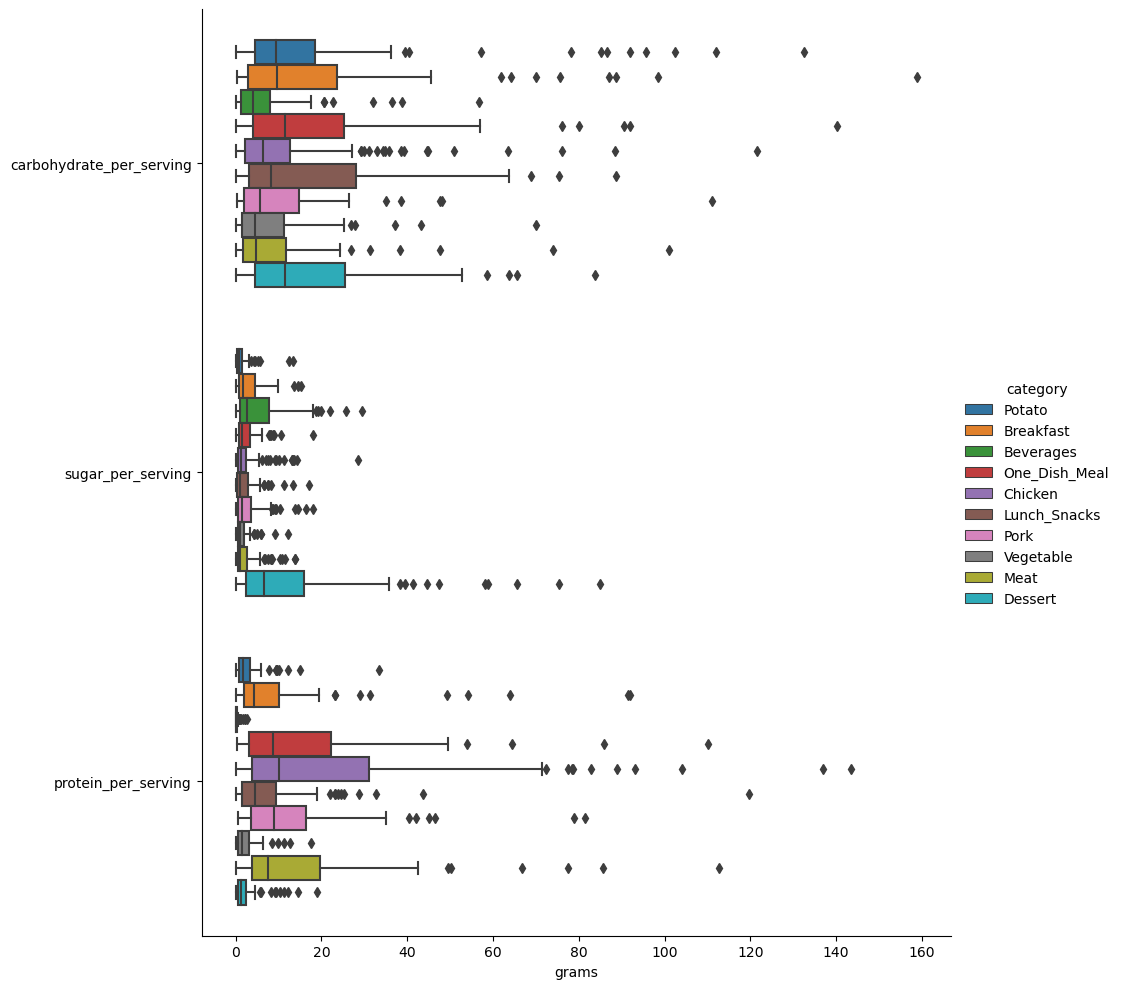

In [30]:
# Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
display_boxplots(qc_recipe_df,id_vars=['category','servings'], value_vars=['carbohydrate_per_serving','sugar_per_serving','protein_per_serving'], value_name='grams', var_name='', aspect_ratio=1)

--- 
## Feature Engineering

In [31]:
EDA_recipe_df = qc_recipe_df.drop(columns=["sugar", "calories", "protein", "carbohydrate"])

### Calculating Fat amount in g, and macro-nutrient %

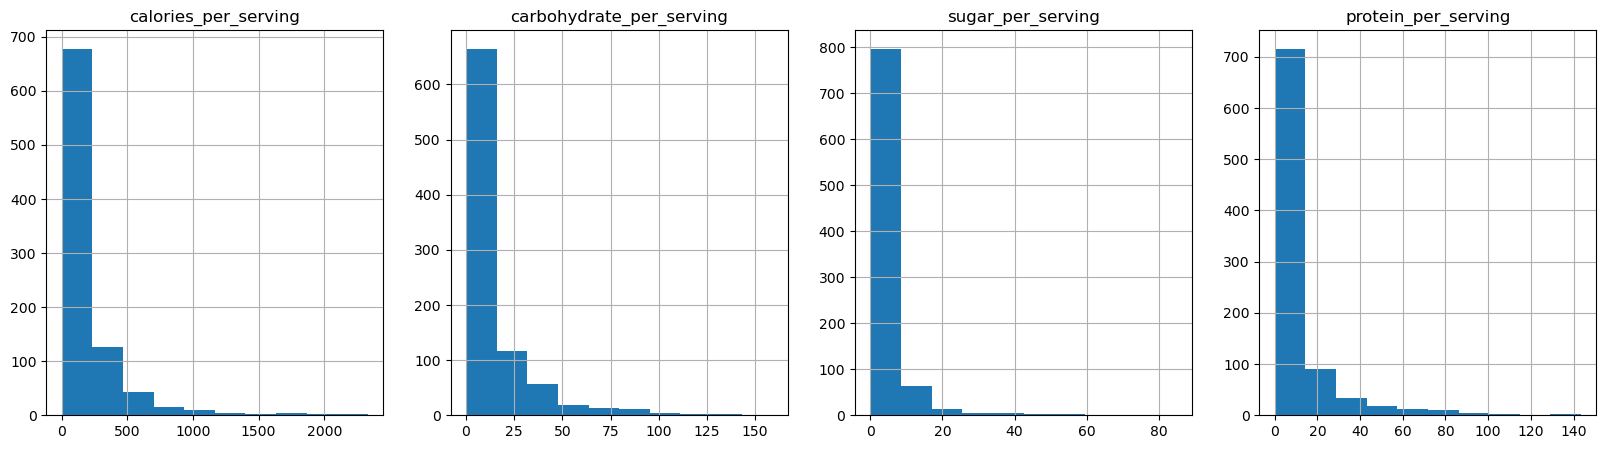

In [32]:
# create the subplots
fig, axs = plt.subplots(1, 4, figsize=(20,5))

# plot the histograms
qc_recipe_df["calories_per_serving"].hist(ax=axs[0])
qc_recipe_df["carbohydrate_per_serving"].hist(ax=axs[1])
qc_recipe_df["sugar_per_serving"].hist(ax=axs[2])
qc_recipe_df["protein_per_serving"].hist(ax=axs[3])

# Add titles to the subplots
axs[0].set_title("calories_per_serving")
axs[1].set_title("carbohydrate_per_serving")
axs[2].set_title("sugar_per_serving")
axs[3].set_title("protein_per_serving")

plt.show()

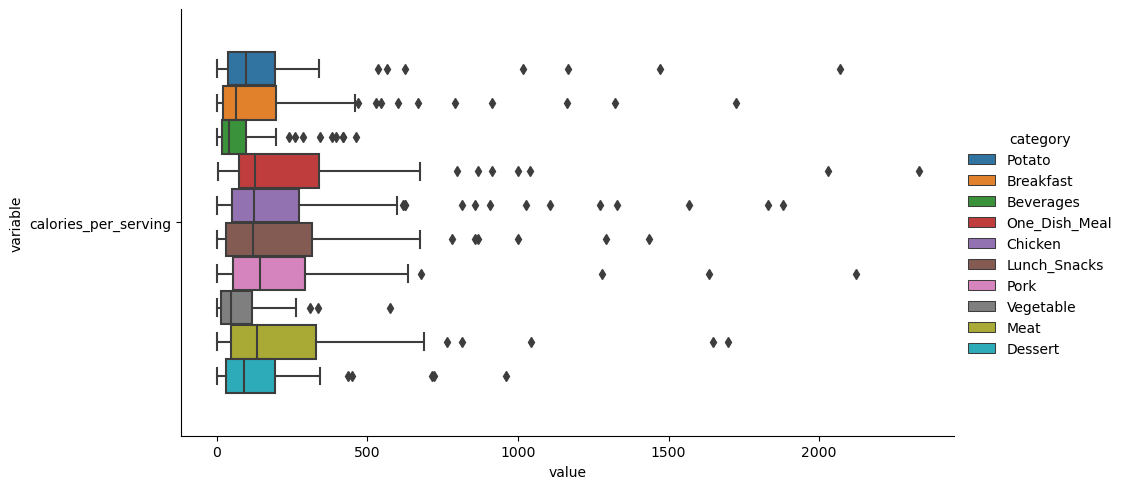

In [33]:
import seaborn as sns

# Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
melted_df = qc_recipe_df.melt(id_vars=['category','servings'], value_vars=['calories_per_serving'], value_name='value', var_name='variable')

# Use catplot to create boxplots for the columns 'calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving'
sns.catplot(data=melted_df, x='value', y='variable', hue='category', kind='box', aspect=2)

# Show the plot
plt.show()


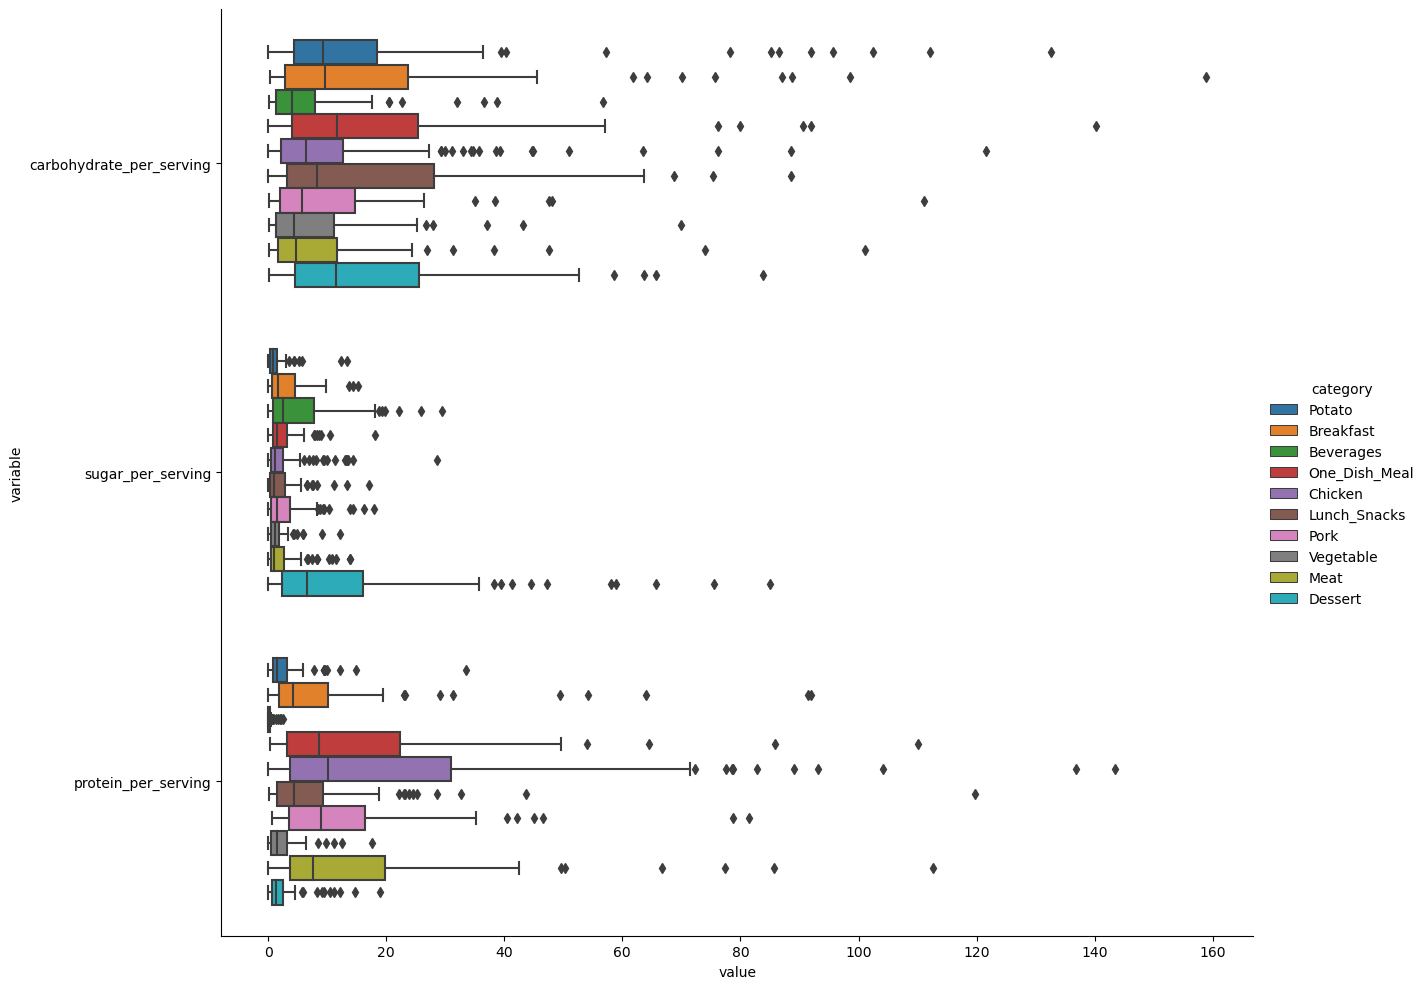

In [34]:
# Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
melted_df2 = qc_recipe_df.melt(id_vars=['category','servings'], value_vars=['carbohydrate_per_serving','sugar_per_serving','protein_per_serving'], value_name='value', var_name='variable')


# Use catplot to create boxplots for the columns 'calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving'
sns.catplot(data=melted_df2, x='value', y='variable', hue='category', kind='box', height=10, aspect=1.3)

# Show the plot
plt.show()


### Let's identify those outliers 

In [35]:
def id_outlier(food_spec,qa1,qa3):
    # Calculate the interquartile range (IQR) of the 'calories' column
    q1, q3 = qc_recipe_df[food_spec].quantile([qa1,qa3])
    iqr = q3 - q1
    
    # Identify the outliers using the IQR and the lower and upper bounds.
    lower_bound = 0 #q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = qc_recipe_df[(qc_recipe_df[food_spec] < lower_bound) | (qc_recipe_df[food_spec] > upper_bound)]

    return outliers


In [36]:
id_outlier('calories_per_serving',0.5,0.95)

calories  carbohydrate  sugar  protein       category  servings  \
recipe_id                                                                    
18         1,695.82          0.10   0.39    33.17           Meat         1   
50         1,724.25         45.52   0.07    49.37      Breakfast         1   
56         2,122.24         25.99   0.52    81.37           Pork         1   
148        1,568.00         15.49   5.23    53.23        Chicken         1   
293        1,878.82          0.80   7.60    89.01        Chicken         1   
419        1,830.28          3.92   1.83    44.74        Chicken         1   
429        1,646.83        101.11   2.77    14.87           Meat         1   
567        1,635.46         35.00   9.39    42.13           Pork         1   
637        2,029.33         25.08   0.61    54.00  One_Dish_Meal         1   
782        2,068.07         34.23   1.46    10.02         Potato         1   
908        2,332.32          7.47   3.62    34.33  One_Dish_Meal         1   

           high_traffic  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                                 
18                    1              1,695.82                      0.10   
50                    1              1,724.25                     45.52   
56                    1              2,122.24                     25.99   
148                   0              1,568.00                     15.49   
293                   1              1,878.82                      0.80   
419                   1              1,830.28                      3.92   
429                   1              1,646.83                    101.11   
567                   0              1,635.46                     35.00   
637                   1              2,029.33                     25.08   
782                   1              2,068.07                     34.23   
908                   1              2,332.32                      7.47   

           sugar_per_serving  protein_per_serving  
recipe_id                                          
18                      0.39                33.17  
50                      0.07                49.37  
56                      0.52                81.37  
148                     5.23                53.23  
293                     7.60                89.01  
419                     1.83                44.74  
429                     2.77                14.87  
567                     9.39                42.13  
637                     0.61                54.00  
782                     1.46                10.02  
908                     3.62                34.33

In [37]:
id_outlier('protein_per_serving',0.5,0.95)

calories  carbohydrate  sugar  protein       category  servings  \
recipe_id                                                                    
30           164.76         33.58  17.87   220.14  One_Dish_Meal         2   
64           813.08         88.55   0.47   136.89        Chicken         1   
343          111.10         37.55   6.60   239.57   Lunch_Snacks         2   
639          321.95          1.41  10.76   112.64           Meat         1   
696          891.11         15.20   1.50   286.97        Chicken         2   

           high_traffic  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                                 
30                    1                 82.38                     16.79   
64                    1                813.08                     88.55   
343                   0                 55.55                     18.77   
639                   1                321.95                      1.41   
696                   0                445.56                      7.60   

           sugar_per_serving  protein_per_serving  
recipe_id                                          
30                      8.94               110.07  
64                      0.47               136.89  
343                     3.30               119.78  
639                    10.76               112.64  
696                     0.75               143.49

In [38]:
id_outlier('sugar_per_serving',0.5,0.95)

calories  carbohydrate  sugar  protein category  servings  \
recipe_id                                                              
60           384.93         74.38  76.53     2.17  Dessert         2   
97            88.57         14.31  47.32     5.67  Dessert         1   
134          959.51          4.40  44.54    12.12  Dessert         1   
272          435.94         58.65  39.46    11.18  Dessert         1   
291          239.90         51.13 131.39     3.38  Dessert         2   
379          235.91         43.20  41.24     4.27  Dessert         1   
497          260.15         23.07  71.52     3.22  Dessert         2   
593           87.04          7.73  84.96     9.45  Dessert         1   
669          343.96         23.79  58.88     0.41  Dessert         1   
811          336.13         38.56  75.48    14.64  Dessert         1   
932          110.17         65.70  58.15     5.92  Dessert         1   

           high_traffic  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                                 
60                    0                192.47                     37.19   
97                    1                 88.57                     14.31   
134                   0                959.51                      4.40   
272                   1                435.94                     58.65   
291                   1                119.95                     25.57   
379                   1                235.91                     43.20   
497                   1                130.07                     11.54   
593                   1                 87.04                      7.73   
669                   1                343.96                     23.79   
811                   0                336.13                     38.56   
932                   1                110.17                     65.70   

           sugar_per_serving  protein_per_serving  
recipe_id                                          
60                     38.27                 1.08  
97                     47.32                 5.67  
134                    44.54                12.12  
272                    39.46                11.18  
291                    65.69                 1.69  
379                    41.24                 4.27  
497                    35.76                 1.61  
593                    84.96                 9.45  
669                    58.88                 0.41  
811                    75.48                14.64  
932                    58.15                 5.92

In [39]:
id_outlier('carbohydrate_per_serving',0.5,0.95)

calories  carbohydrate  sugar  protein       category  servings  \
recipe_id                                                                    
228          124.79        158.92   1.76    23.07      Breakfast         1   
240          593.56        243.20   0.60     2.56        Chicken         2   
451          182.76        530.42   5.80     5.01         Potato         4   
718          999.59        140.22   5.08     0.76  One_Dish_Meal         1   

           high_traffic  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                                 
228                   1                124.79                    158.92   
240                   0                296.78                    121.60   
451                   1                 45.69                    132.60   
718                   1                999.59                    140.22   

           sugar_per_serving  protein_per_serving  
recipe_id                                          
228                     1.76                23.07  
240                     0.30                 1.28  
451                     1.45                 1.25  
718                     5.08                 0.76

##### The value of protein > 150, sugar >100 , carb > 200 seems really extreme. We will remove them 

In [40]:
outliers = qc_recipe_df[(qc_recipe_df['carbohydrate_per_serving'] > 200) | (qc_recipe_df['sugar_per_serving'] > 100) | (qc_recipe_df['protein_per_serving'] > 150)]

In [41]:
outliers

Empty DataFrame
Columns: [calories, carbohydrate, sugar, protein, category, servings, high_traffic, calories_per_serving, carbohydrate_per_serving, sugar_per_serving, protein_per_serving]
Index: []

In [42]:
# Remove the subset dataframe 'outliers' from the original dataset
qc_recipe_df = pd.concat([qc_recipe_df, outliers]).drop_duplicates(keep=False)

<Figure size 2000x500 with 0 Axes>

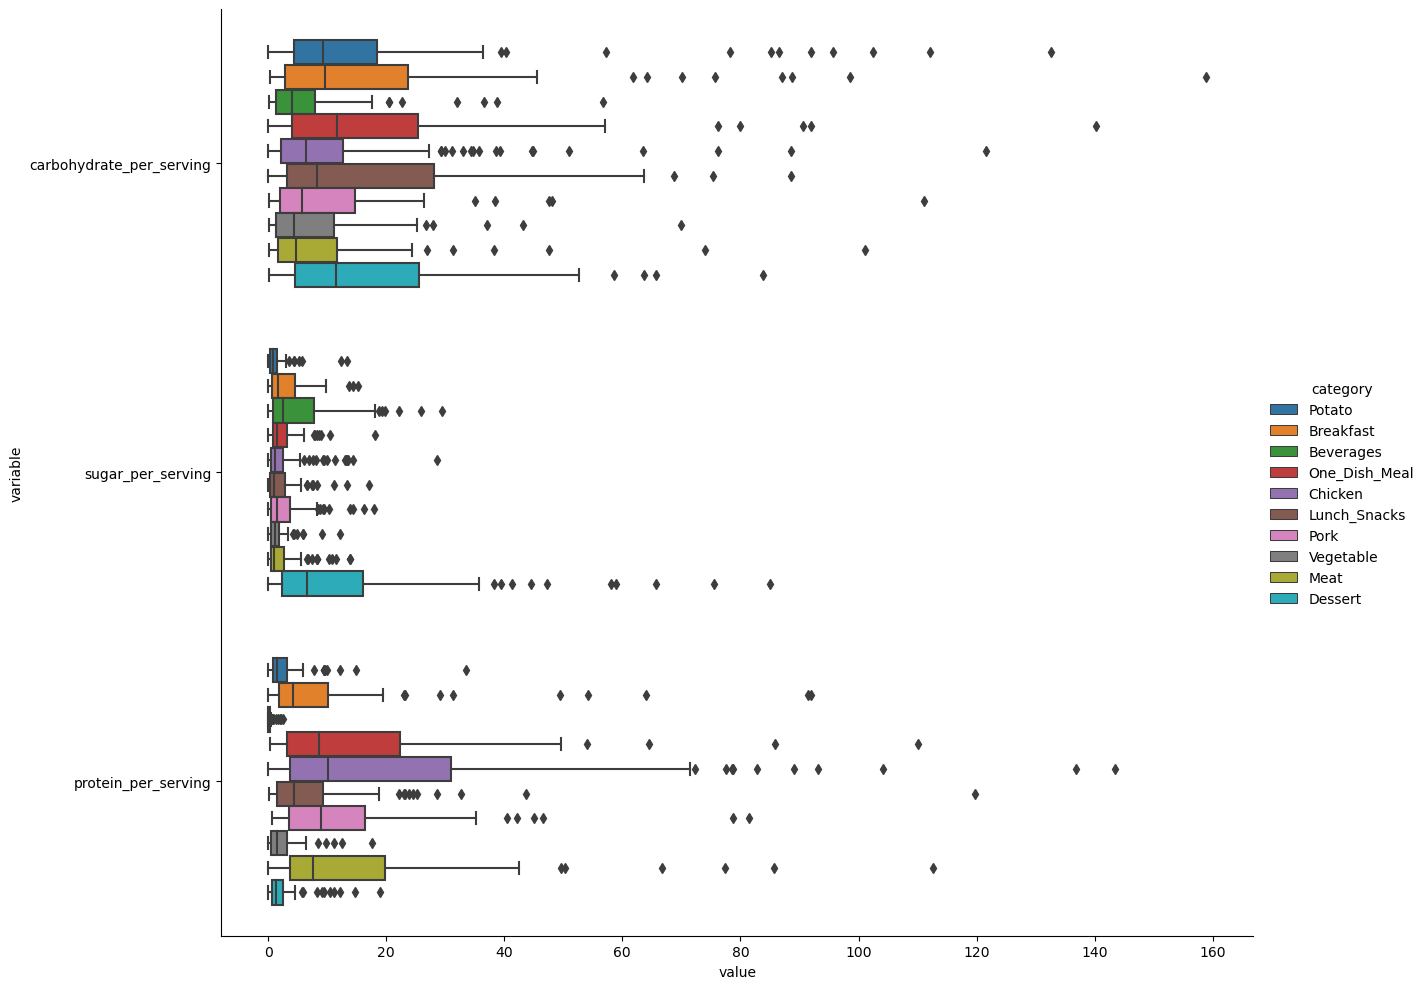

In [43]:
# Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
melted_df2 = qc_recipe_df.melt(id_vars=['category','servings'], value_vars=['carbohydrate_per_serving','sugar_per_serving','protein_per_serving'], value_name='value', var_name='variable')

# Create a new figure with a specific size
plt.figure(figsize=(20,5))

# Use catplot to create boxplots for the columns 'calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving'
sns.catplot(data=melted_df2, x='value', y='variable', hue='category', kind='box', height=10, aspect=1.3)

# Show the plot
plt.show()

### Let's now deal with the non-data value we have in the dataframe, by using the average of the food specs ('carbohydrate_per_serving','sugar_per_serving','protein_per_serving') per category 

In [44]:
# group data by category
grouped_data = qc_recipe_df.groupby('category')

# calculate median of food specs per category
median_carbohydrate = grouped_data['carbohydrate_per_serving'].median()
median_sugar = grouped_data['sugar_per_serving'].median()
median_protein = grouped_data['protein_per_serving'].median()

# fill non-data values in original dataframe with calculated median, as each distribution of macro nutrient is right-skewed
qc_recipe_df['carbohydrate_per_serving'] = qc_recipe_df['carbohydrate_per_serving'].fillna(qc_recipe_df.groupby('category')['carbohydrate_per_serving'].transform('median'))
qc_recipe_df['sugar_per_serving'] = qc_recipe_df['sugar_per_serving'].fillna(qc_recipe_df.groupby('category')['sugar_per_serving'].transform('median'))
qc_recipe_df['protein_per_serving'] = qc_recipe_df['protein_per_serving'].fillna(qc_recipe_df.groupby('category')['protein_per_serving'].transform('median'))
qc_recipe_df['calories_per_serving'] = qc_recipe_df['calories_per_serving'].fillna(qc_recipe_df.groupby('category')['calories_per_serving'].transform('median'))


<Axes: >

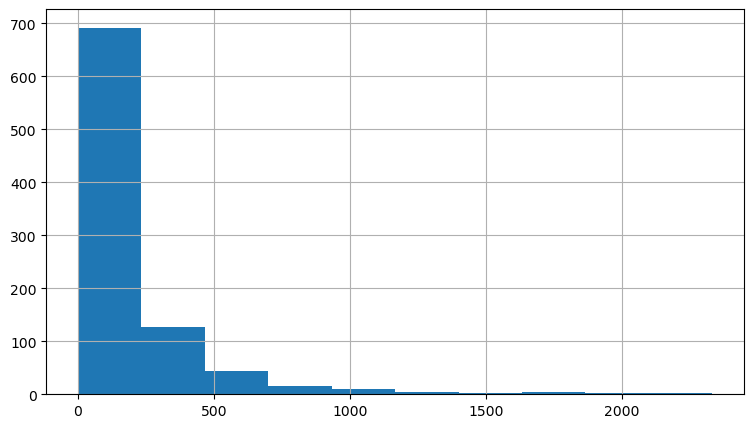

In [45]:
# Set the plot size by default for all matplotlib images
plt.rc('figure', figsize=(9,5))

qc_recipe_df['calories_per_serving'].hist()

In [46]:
qc_recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 2 to 947
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   calories                  891 non-null    float64
 1   carbohydrate              891 non-null    float64
 2   sugar                     891 non-null    float64
 3   protein                   891 non-null    float64
 4   category                  905 non-null    object 
 5   servings                  905 non-null    int64  
 6   high_traffic              905 non-null    int64  
 7   calories_per_serving      905 non-null    float64
 8   carbohydrate_per_serving  905 non-null    float64
 9   sugar_per_serving         905 non-null    float64
 10  protein_per_serving       905 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 84.8+ KB


In [47]:
qc_recipe_df['high_traffic'].value_counts()

1    541
0    364
Name: high_traffic, dtype: int64

## EXploratory Data Analysis 
--- 

In [48]:
EDA_recipe_df = qc_recipe_df.drop(columns=["sugar", "calories", "protein", "carbohydrate"])


### Calculating Fat amount in g, and macro-nutrient %

In [49]:
# we can use the formula : Fat (g) = (Total Calories - (Protein (g) * 4 + Carbohydrates (g) * 4 + Sugar (g) * 4)) / 9
# approximation from source: https://www.livestrong.com/article/81042-calculate-percentage-calories-fat-carbohydrate/
# ‌Carbohydrates:‌ 4 calories per gram
#  Fat:‌ 9 calories per gram
#  Protein:‌ 4 calories per gram
#  average daily intake = 1,600 calories per day per person

EDA_recipe_df['fat_per_serving'] = (EDA_recipe_df['calories_per_serving'] - ( EDA_recipe_df['protein_per_serving']*4 + EDA_recipe_df['carbohydrate_per_serving']*4) )/9
EDA_recipe_df['fat_per_serving'] = EDA_recipe_df['fat_per_serving'].clip(lower=0)

<Axes: >

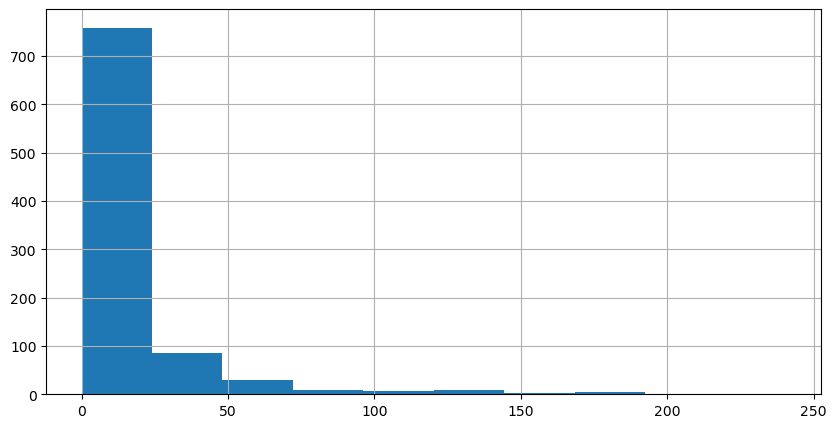

In [50]:
# Set the plot size
plt.subplots(figsize=(10,5))

EDA_recipe_df['fat_per_serving'].hist()

In [51]:
EDA_recipe_df['fat_per_serving'].describe()

count   905.00
mean     13.47
std      26.84
min       0.00
25%       0.00
50%       3.49
75%      14.67
max     240.57
Name: fat_per_serving, dtype: float64

### Imputing values for missing data in the macro-nutrients
We will be using the median of each category to fill the missing data, as our distribution are skewed to the right.

In [52]:
# group data by category
grouped_data = EDA_recipe_df.groupby('category')

# calculate median of food specs per category
median_carbohydrate = grouped_data['carbohydrate_per_serving'].median()
median_sugar = grouped_data['sugar_per_serving'].median()
median_protein = grouped_data['protein_per_serving'].median()
median_fat = grouped_data['fat_per_serving'].median()

# fill non-data values in original dataframe with calculated median, as each distribution of macro nutrient is right-skewed
EDA_recipe_df['carbohydrate_per_serving'] = EDA_recipe_df['carbohydrate_per_serving'].fillna(qc_recipe_df.groupby('category')['carbohydrate_per_serving'].transform('median'))
EDA_recipe_df['sugar_per_serving'] = EDA_recipe_df['sugar_per_serving'].fillna(EDA_recipe_df.groupby('category')['sugar_per_serving'].transform('median'))
EDA_recipe_df['protein_per_serving'] = EDA_recipe_df['protein_per_serving'].fillna(EDA_recipe_df.groupby('category')['protein_per_serving'].transform('median'))
EDA_recipe_df['calories_per_serving'] = EDA_recipe_df['calories_per_serving'].fillna(EDA_recipe_df.groupby('category')['calories_per_serving'].transform('median'))
EDA_recipe_df['fat_per_serving'] = EDA_recipe_df['fat_per_serving'].fillna(EDA_recipe_df.groupby('category')['fat_per_serving'].transform('median'))


In [53]:
# Now let's calculate the percentengages of macro nurients
EDA_recipe_df['weight_per_serving'] = EDA_recipe_df['fat_per_serving'] + EDA_recipe_df['protein_per_serving'] + EDA_recipe_df['carbohydrate_per_serving']+EDA_recipe_df['sugar_per_serving']

EDA_recipe_df['carb_%'] = EDA_recipe_df['carbohydrate_per_serving'] / EDA_recipe_df['weight_per_serving']

EDA_recipe_df['protein_%'] = EDA_recipe_df['protein_per_serving'] / EDA_recipe_df['weight_per_serving']

EDA_recipe_df['fat_%'] = EDA_recipe_df['fat_per_serving'] / EDA_recipe_df['weight_per_serving']
EDA_recipe_df['sugar_%'] = EDA_recipe_df['sugar_per_serving'] / EDA_recipe_df['weight_per_serving']
EDA_recipe_df['daily_intake_%'] = EDA_recipe_df['calories_per_serving'] / 1600


In [54]:
EDA_recipe_df.describe()

servings  high_traffic  calories_per_serving  carbohydrate_per_serving  \
count    905.00        905.00                905.00                    905.00   
mean       3.46          0.60                190.55                     13.99   
std        1.74          0.49                288.59                     19.74   
min        1.00          0.00                  0.07                      0.01   
25%        2.00          0.00                 34.59                      2.52   
50%        4.00          1.00                 94.79                      6.88   
75%        4.00          1.00                222.93                     15.80   
max        6.00          1.00              2,332.32                    158.92   

       sugar_per_serving  protein_per_serving  fat_per_serving  \
count             905.00               905.00           905.00   
mean                3.62                10.16            13.47   
std                 7.22                17.91            26.84   
min                 0.00                 0.00             0.00   
25%                 0.55                 1.01             0.00   
50%                 1.37                 3.34             3.49   
75%                 3.58                10.78            14.67   
max                84.96               143.49           240.57   

       weight_per_serving  carb_%  protein_%  fat_%  sugar_%  daily_intake_%  
count              905.00  905.00     905.00 905.00   905.00          905.00  
mean                41.25    0.37       0.23   0.28     0.12            0.12  
std                 44.18    0.28       0.24   0.29     0.15            0.18  
min                  1.00    0.00       0.00   0.00     0.00            0.00  
25%                 14.22    0.12       0.05   0.00     0.02            0.02  
50%                 25.31    0.31       0.15   0.22     0.05            0.06  
75%                 50.49    0.58       0.35   0.52     0.15            0.14  
max                295.97    0.99       0.97   0.98     0.92            1.46

In [55]:
EDA_recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 2 to 947
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category                  905 non-null    object 
 1   servings                  905 non-null    int64  
 2   high_traffic              905 non-null    int64  
 3   calories_per_serving      905 non-null    float64
 4   carbohydrate_per_serving  905 non-null    float64
 5   sugar_per_serving         905 non-null    float64
 6   protein_per_serving       905 non-null    float64
 7   fat_per_serving           905 non-null    float64
 8   weight_per_serving        905 non-null    float64
 9   carb_%                    905 non-null    float64
 10  protein_%                 905 non-null    float64
 11  fat_%                     905 non-null    float64
 12  sugar_%                   905 non-null    float64
 13  daily_intake_%            905 non-null    float64
dtypes: float64

---
### Clustering in Macro Nutrient Categories
#### We define clusters based on the macro-nutrients level

In [56]:
# Filter the data to include only instances that fit the ranges for foods that are balanced for adults: 
# balanced_food should be in the following ranges : 
# - protein_% >=10 and protein_% <=35
# - fat_% >= 20% and fat_% <= 35%
# - carb_% >= 45% and carb_% <= 70%
#
# Note: in earlier tests, using the above cutoffs value lead into a very low ratio of balanced foods for the TastyRecipe. We will extend a bit those ranges.

cut_off_hi_fat = .55
cut_off_hi_protein = .55
cut_off_hi_carb = .75 #.7
cut_off_lo_fat = .05 #.05
cut_off_lo_protein = .05
cut_off_lo_carb = .35
cut_off_hi_sugar = .3 #.3
cut_off_lo_sugar = .05

In [57]:
# Other test using this time mathematical formaula for defining cluster 

EDA_recipe_df["cluster"] = np.nan

EDA_recipe_df.loc[EDA_recipe_df["cluster"].isnull(), "cluster"] = 0
EDA_recipe_df.loc[EDA_recipe_df["fat_%"] > cut_off_hi_fat, "cluster"] = 1
EDA_recipe_df.loc[EDA_recipe_df["protein_%"] > cut_off_hi_protein, "cluster"] = 2
EDA_recipe_df.loc[EDA_recipe_df["carb_%"] > cut_off_hi_carb, "cluster"] = 3


### We will manually add a 4th class, corresponding to balanced foods. 
#### For this, we will first creeate a Mask for balanced foods: 

In [58]:
#     (EDA_recipe_df['protein_%'] >= .1) & (EDA_recipe_df['protein_%'] <= .5) 
#    & ((EDA_recipe_df['fat_%'] >= .2) & (EDA_recipe_df['fat_%'] <= .5)) 
#    & ((EDA_recipe_df['carb_%'] >= .1) & (EDA_recipe_df['carb_%'] <= .7))

mask_balanced = (
    (EDA_recipe_df['protein_%'] >= cut_off_lo_protein) & (EDA_recipe_df['protein_%'] <= cut_off_hi_protein) 
    & ((EDA_recipe_df['fat_%'] >= cut_off_lo_fat) & (EDA_recipe_df['fat_%'] <= cut_off_hi_fat)) 
    & ((EDA_recipe_df['carb_%'] >= cut_off_lo_carb) & (EDA_recipe_df['carb_%'] <= cut_off_hi_carb))
)

#balanced_food = EDA_recipe_df[mask_balanced]

balanced_recipe_df = EDA_recipe_df[mask_balanced]

# Assign a new label named 4  to the instances that belong to the new category
EDA_recipe_df['cluster'] = np.where(mask_balanced, 4, EDA_recipe_df['cluster'])

### Add a 5th cluster for very unhealthy food like donuts, where fat and sugar are balanced and 

In [59]:
mask_unhealthy = (EDA_recipe_df['sugar_%'] >= cut_off_hi_sugar)

#Assign a new label named 5  to the instances that belong to the new category
EDA_recipe_df['cluster'] = np.where(mask_unhealthy, 5, EDA_recipe_df['cluster'])

In [60]:
print("Total % of somewhat balanced food in the website= ",round(len (balanced_recipe_df)/len (EDA_recipe_df),2)*100," %")

Total % of somewhat balanced food in the website=  12.0  %


In [61]:
EDA_recipe_df['cluster'] = EDA_recipe_df['cluster'].astype(int)
number_cluster = np.max(EDA_recipe_df['cluster'])

for i in range(0,number_cluster+1) : 
    print ("cluster ",i," ratio = ", 
        round(len(EDA_recipe_df.loc[EDA_recipe_df['cluster']==i])/len(EDA_recipe_df),2)
    )

cluster  0  ratio =  0.31
cluster  1  ratio =  0.23
cluster  2  ratio =  0.12
cluster  3  ratio =  0.13
cluster  4  ratio =  0.11
cluster  5  ratio =  0.1


In [62]:
# Group the DataFrame by the cluster labels and calculate the mean for each column
cluster_means = EDA_recipe_df[["carb_%", "protein_%", "fat_%","cluster"]].groupby("cluster").mean().reset_index()

print(cluster_means)

   cluster  carb_%  protein_%  fat_%
0        0    0.41       0.26   0.22
1        1    0.12       0.11   0.71
2        2    0.16       0.74   0.05
3        3    0.86       0.08   0.01
4        4    0.48       0.18   0.26
5        5    0.27       0.09   0.14


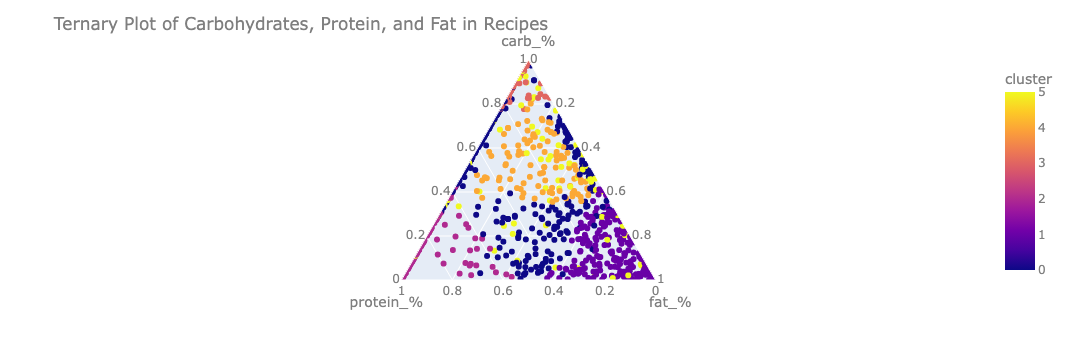

In [63]:
import plotly.express as px

fig = px.scatter_ternary(EDA_recipe_df, a="carb_%", b="protein_%", c="fat_%",color='cluster',hover_name='cluster')
fig.update_layout(
    title="Ternary Plot of Carbohydrates, Protein, and Fat in Recipes",
    font=dict(
        size=12,
        color="#7f7f7f"
    ),
    scene=dict(
        xaxis_title="Carbohydrates (%)",
        yaxis_title="Protein (%)",
        zaxis_title="Fat (%)"
    )
)
fig.show()

In [64]:
# create bins and labels for fat_%
sugar_bins = [0, cut_off_lo_sugar, cut_off_hi_sugar, 1]
fat_bins = [0, cut_off_lo_fat, cut_off_hi_fat, 1]
protein_bins = [0, cut_off_lo_protein, cut_off_hi_protein, 1]
carb_bins = [0, cut_off_lo_carb, cut_off_hi_carb, 1] 

labels = ['Low', 'Mid', 'High']

# create a new column called fat_content with categorical values
EDA_recipe_df['fat_content'] = pd.cut(EDA_recipe_df['fat_%'], bins=fat_bins, labels=labels)
EDA_recipe_df['protein_content'] = pd.cut(EDA_recipe_df['protein_%'], bins=protein_bins, labels=labels)
EDA_recipe_df['carb_content'] = pd.cut(EDA_recipe_df['carb_%'], bins=carb_bins, labels=labels)
EDA_recipe_df['sugar_content'] = pd.cut(EDA_recipe_df['sugar_%'], bins=sugar_bins, labels=labels)

### Relationship between categorical columns and traffic 

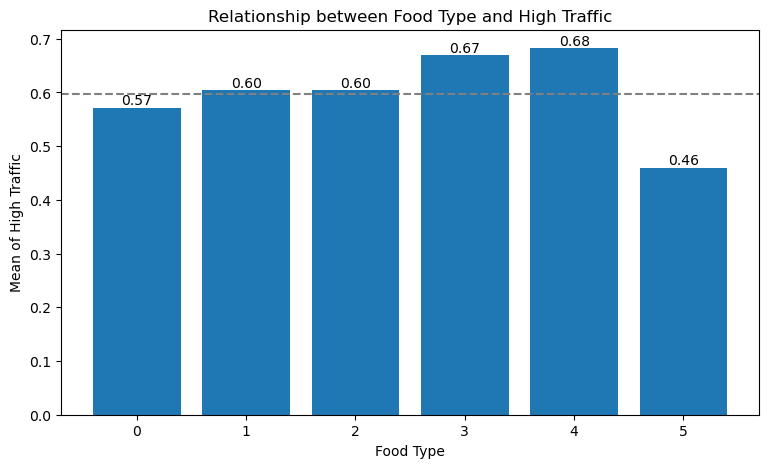

In [65]:
# Group the data by food type and get the mean of high_traffic for each group
grouped_data = EDA_recipe_df.groupby(['cluster'])['high_traffic'].mean()

average_traffic = EDA_recipe_df['high_traffic'].mean()

# Plot the bar chart
bar_plot = plt.bar(grouped_data.index, grouped_data.values)     

# Loop through each bar and add the value
for i, v in enumerate(grouped_data.values):
    plt.text(i, v, f'{v:.2f}',ha='center', va='bottom')
    
# Add the average line
plt.axhline(y=average_traffic, color='gray', linestyle='--')
    
plt.xlabel('Food Type')
plt.ylabel('Mean of High Traffic')
plt.title('Relationship between Food Type and High Traffic')
plt.show()


Our food types can be classified as follows:

- Type 0: Somewhat unbalanced foods
- Type 1: High protein
- Type 2: High fat
- Type 3: High carb
- Type 4: Healthier choices
- Type 5 : Unhealthy recipe (high sugar)

According to our historical data, Type 3 and 4 appear to be more popular, while Type 5 appears to be unpopular.

Type 3 (High-carb) are foods like pasta, bread, and rice, which are often very affordable and easy to find and cook, making them a popular choice for people on a budget or without access to diversified food. Tasty Bytes was launched during the COVID pandemic, with goal to provide easy to cook recipe for people with limited access to fresh and varied ingredients. High-carb foods can also be quite satisfying and filling, which can make them a good choice for people who want to feel full and satisfied after a meal. 

The popularity of the "somewhat balanced recipes" (Type 4) could be due to the fact that they offer a well-rounded and satisfying meal, appealing to a wider range of people. A balanced meal is also often perceived as a healthier option, which could also contribute to its popularity.

Recipes that fall into Type 5 (high sugar) are often considered unhealthy due to their high levels of sugar, which can contribute to a range of health problems if consumed excessively. Desserts and/or fruity beverages typically correspond to this type. It is possible that recipes in this category could be unpopular if they are perceived as too unhealthy. 

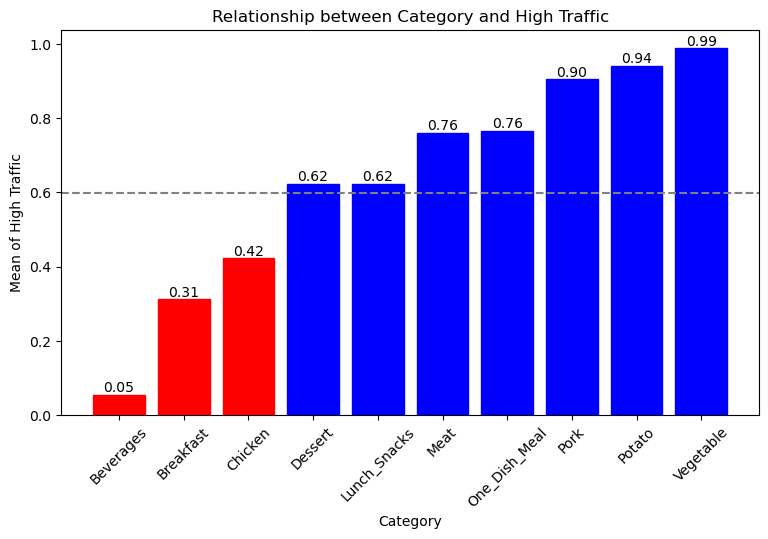

In [66]:
# Group the data by food type and get the mean of high_traffic for each group
grouped_data = EDA_recipe_df.groupby(['category'])['high_traffic'].mean()

# Plot the bar chart
bar_plot = plt.bar(grouped_data.index, grouped_data.values)

# Loop through each bar and add the value
for i, v in enumerate(grouped_data.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Mean of High Traffic')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add the average line
plt.axhline(y=average_traffic, color='gray', linestyle='--')

# Color bars red or blue based on their value
for bar in bar_plot:
    if bar.get_height() < average_traffic:
        bar.set_color('red')
    else:
        bar.set_color('blue')

plt.title('Relationship between Category and High Traffic')
plt.show()


One possible explanation is that consumers may be looking for tasty and filling recipes in their meal choices on Tasty Bytes, which can make rich meat (other than chicken), and vegetable (inc. potato) dishes, more appealing. Additionally, these types of foods are often associated with celebrations and special occasions, such like meals for Thanksgivig or Holidays, which could also contribute to their popularity. 

On the other hand, beverages, breakfast meals, and chicken-based meals maybe less tasty and may not stand out as unique or special, which could make them less popular among consumers. Another factor that could contribute to the impopularity of these recipes is convenience, as beverages and breakfast meals are often associated with quick and easy meal options, that would not require looking for a recipe for them.

**--> Users browsing Tasty Bytes may be likely seeking both healthy and delicious food choices, so it's important that our recipes cater to these preferences.**

---
### function for encoding dummies

In [67]:
def dummies (df:pd.DataFrame,cols,prefix):
    # Select the categorical columns to be encoded
    categorical_cols = [cols]
    
    # Create dummy variables for each category
    df_dummies = pd.get_dummies(df[categorical_cols], prefix)
    
    # Drop the original categorical columns
    df.drop(categorical_cols, axis=1, inplace=True)
    
    # Concatenate the original dataframe with the dummy encoded dataframe
    df = pd.concat([df, df_dummies], axis=1)

    return df

In [68]:
EDA_recipe_df = dummies (EDA_recipe_df,'category', 'meal')
EDA_recipe_df['cluster'] = EDA_recipe_df['cluster'].astype(str)
EDA_recipe_df = dummies (EDA_recipe_df,'cluster', 'type')
EDA_recipe_df = dummies (EDA_recipe_df,'fat_content', 'fat')
EDA_recipe_df = dummies (EDA_recipe_df,'protein_content', 'protein')
EDA_recipe_df = dummies (EDA_recipe_df,'carb_content', 'carb')
EDA_recipe_df = dummies (EDA_recipe_df,'sugar_content', 'sugar')

In [69]:
EDA_recipe_df.columns

Index(['servings', 'high_traffic', 'calories_per_serving',
       'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving',
       'fat_per_serving', 'weight_per_serving', 'carb_%', 'protein_%', 'fat_%',
       'sugar_%', 'daily_intake_%', 'meal_Beverages', 'meal_Breakfast',
       'meal_Chicken', 'meal_Dessert', 'meal_Lunch_Snacks', 'meal_Meat',
       'meal_One_Dish_Meal', 'meal_Pork', 'meal_Potato', 'meal_Vegetable',
       'type_0', 'type_1', 'type_2', 'type_3', 'type_4', 'type_5', 'fat_Low',
       'fat_Mid', 'fat_High', 'protein_Low', 'protein_Mid', 'protein_High',
       'carb_Low', 'carb_Mid', 'carb_High', 'sugar_Low', 'sugar_Mid',
       'sugar_High'],
      dtype='object')

In [70]:
# Drop columns macro nutrients %
EDA_recipe_df = EDA_recipe_df.drop(['carb_%', 'protein_%','fat_%','sugar_%'], axis=1)

In [71]:
EDA_recipe_df.dtypes

servings                      int64
high_traffic                  int64
calories_per_serving        float64
carbohydrate_per_serving    float64
sugar_per_serving           float64
protein_per_serving         float64
fat_per_serving             float64
weight_per_serving          float64
daily_intake_%              float64
meal_Beverages                uint8
meal_Breakfast                uint8
meal_Chicken                  uint8
meal_Dessert                  uint8
meal_Lunch_Snacks             uint8
meal_Meat                     uint8
meal_One_Dish_Meal            uint8
meal_Pork                     uint8
meal_Potato                   uint8
meal_Vegetable                uint8
type_0                        uint8
type_1                        uint8
type_2                        uint8
type_3                        uint8
type_4                        uint8
type_5                        uint8
fat_Low                       uint8
fat_Mid                       uint8
fat_High                    

---
# 4) Model Development

## Choosing the Right Approach

We have a labeled dataset with a target variable (dependent variable) and the goal is to predict the outcome of a binary event (high traffic or not).

- **Binary classification is the best approach in this case** because we are trying to predict a binary outcome, and whether a recipe will lead to high web traffic or not - i.e, we are trying to classify each recipe as either belonging to the high traffic group or not. Our dependent variable "high_traffic" is a categorical variable that can only take one of two possible values, making binary classification the most appropriate approach for this problem. 

- Clustering is an unsupervised learning technique that is used to group similar data points together. It would not be able to help us achieve our goal because it is not designed to predict labeled data. 

- Regression is used to predict a continuous output, such as a numerical value. In this case, the target variable is binary, meaning it has only two possible outcomes (high traffic or not). 

Both regression and clustering could have worked if we had a numerical continuous column for the traffic, detailing the numerical amount of traffic for a given recipe.

## Choosing the Right Business Metric
We have several business metrics we can use for a binary classification model. All of them are %:  

- _Accuracy:_ measures the overall proportion of correct predictions, i.e., the number of true positive (TP) and true negative (TN) predictions divided by the total number of predictions. Accuracy alone doesn't always provide the complete picture, especially when the data is imbalanced (as it is the case here) or if one of the classes has a more important impact on the final outcome.

- _Precision:_ measures the proportion of true positive predictions among all positive predictions. Precision is important if we want to minimize false positive predictions. 

- _Recall:_ measures the proportion of true positive predictions among all actual positive instances. Recall is important if we want to minimize false negative predictions, i.e., to ensure that we don't miss high traffic recipes.

- _AUC (Area Under the receiver operating Curve)_: measures how well the 2 classes are separated . The higher the AUC, the better, with a 100% meaning the classes are perfectly separated, and a 50% meaning they are overlapping. Values of AUC below 70% would indicate the presence of false positives, which we want to avoid in our case.

Our objective is to ensure that we predict high-traffic recipes 80% of the time, and to minimize false positive predictions. Precision and recall (in this order) are the relevant metrics to consider, along with high values of AUC.

The F1 score, which is the harmonic mean of precision and recall, provides a good balance between precision and recall and is a useful metric to consider in this business case where both precision and recall are equally important.

We will therefore aim at constructing a model with a F1 score above 80%, and we will also monitor precision, recall and AUC (in this order). 

**A model with a precision score above 80% will predict high-traffic recipes accurately 80% of the time.** 

F1, recall and AUC scores above 80% are also desirable, as they are indicator of solid performance, limiting false negatives and separating well the our 2 classes 

### Import all the library we will need for this section

In [72]:
# imports
#import sklearn 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import sklearn.ensemble

# Classification Metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc #, plot_roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# ML models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb

# libraries for Shapely analysis
import shap 

In [73]:
def ROC(classifier,X_train,X_test,y_train,y_test) : 

    # set the increment step
    inc = .05
    
    # get the predicted probabilities of the positive class
    y_score_train = classifier.predict_proba(X_train)[:,1]
    y_score_test = classifier.predict_proba(X_test)[:,1]
    
    # calculate y_train and y_test
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # calculate the fpr, tpr and thresholds for each increment
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_score_test)
    tpr_test_smooth = []
    fpr_test_smooth = []
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_score_train)
    tpr_train_smooth = []
    fpr_train_smooth = []

    
    # interpolate the ROC curve at each increment
    for i in np.arange(0, 1, inc):
        tpr_test_smooth.append(np.interp(i, fpr_test, tpr_test))
        fpr_test_smooth.append(i)
        tpr_train_smooth.append(np.interp(i, fpr_train, tpr_train))
        fpr_train_smooth.append(i)

    # fixing the low and high end points of the ROC curve    
    tpr_train_smooth[0] = 0     
    tpr_test_smooth[0] = 0     
    fpr_train_smooth[0] = 0    
    fpr_test_smooth[0] = 0  
    
    tpr_train_smooth[-1] = 1     
    tpr_test_smooth[-1] = 1      
    fpr_train_smooth[-1] = 1      
    fpr_test_smooth[-1] = 1   
    
    # calculate AUC
    roc_auc_test = auc(fpr_test_smooth, tpr_test_smooth)
    roc_auc_train = auc(fpr_train_smooth, tpr_train_smooth)
    
    # Set the plot size
    plt.subplots(figsize=(8,5))

    # plot the ROC curve with smooth interpolation
    plt.plot(fpr_test_smooth, tpr_test_smooth, lw=2, label='ROC curve for TEST (AUC = %0.2f)' % roc_auc_test)
    plt.plot(fpr_train_smooth, tpr_train_smooth, lw=2, label='ROC curve for TRAIN (AUC = %0.2f)' % roc_auc_train)

    # plot the random guessing line
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')

    # set plot title and labels
    plt.title('Receiver Operating Characteristic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    # show the plot
    plt.show()
    
    # Evaluate the model using a classification report
    training_report = classification_report(y_train, y_train_pred)
    print("TRAINING classification report: \n",training_report)
    
    # Evaluate the model using a classification report
    testing_report = classification_report(y_test, y_test_pred)
    print("\nTESTING classification report: \n",testing_report)
    
    # Calculate the accuracy, precision, F1 and recall of the model
    f1 = f1_score(y_test, y_test_pred, average='micro')
    accuracy= accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    
    # Print the results
    print(f'Test accuracy: {accuracy:.2f}')
    print(f'>> Test precision: {precision:.2f} <<') 
    print(f'Test recall: {recall:.2f}')
    print(f'Test F1 score: {f1:.2f}')
    print(f'Test AUC score: {roc_auc_test:.2f}')

### Dealing with Class Imbalance
We will use oversampling the class 0 (low traffic) with the random duplication of observations with low traffic , as we don't want to remove observations of High Traffic (what we want to predit)

In [74]:
# get the indices of the minority class
minority_indices = EDA_recipe_df[EDA_recipe_df['high_traffic'] == 0].index

# get the indices of the majority class
majority_indices = EDA_recipe_df[EDA_recipe_df['high_traffic'] == 1].index

# set the seed for random number generation
np.random.seed(seed)

# randomly select equal number of indices from the minority class as the majority class
random_minority_indices = np.random.choice(minority_indices, len(majority_indices), replace=True)

# combine the indices of both classes
balanced_indices = np.concatenate([majority_indices, random_minority_indices])

# balance the classes using the indices
BAL_recipe_df = EDA_recipe_df.loc[balanced_indices]

In [75]:
BAL_recipe_df['high_traffic'].value_counts()

1    541
0    541
Name: high_traffic, dtype: int64

---

### Generating the Features and Target Sets

In [76]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = BAL_recipe_df.drop(columns=["high_traffic"])
#X = X.drop(columns=["cluster"])

# Display sample data
display(X.head())
display(X.tail())

servings  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                             
2                 4                  8.87                      9.64   
4                 4                 24.26                      7.64   
6                 2                345.57                      1.73   
9                 6                 89.75                      0.63   
13                4                 68.66                      5.87   

           sugar_per_serving  protein_per_serving  fat_per_serving  \
recipe_id                                                            
2                       0.17                 0.23             0.00   
4                       9.66                 0.01             0.00   
6                       0.82                26.96            25.64   
9                       0.56                 0.63             9.41   
13                      0.39                 0.64             4.73   

           weight_per_serving  daily_intake_%  meal_Beverages  meal_Breakfast  \
recipe_id                                                                       
2                       10.04            0.01               0               0   
4                       17.30            0.02               1               0   
6                       55.16            0.22               0               0   
9                       11.24            0.06               0               0   
13                      11.64            0.04               0               0   

           ...  fat_High  protein_Low  protein_Mid  protein_High  carb_Low  \
recipe_id  ...                                                               
2          ...         0            1            0             0         0   
4          ...         0            1            0             0         0   
6          ...         0            0            1             0         1   
9          ...         1            0            1             0         1   
13         ...         0            0            1             0         0   

           carb_Mid  carb_High  sugar_Low  sugar_Mid  sugar_High  
recipe_id                                                         
2                 0          1          1          0           0  
4                 1          0          0          0           1  
6                 0          0          1          0           0  
9                 0          0          1          0           0  
13                1          0          1          0           0  

[5 rows x 36 columns]

servings  calories_per_serving  carbohydrate_per_serving  \
recipe_id                                                             
620               4                 10.32                      1.11   
421               2                 47.02                      2.58   
925               4                 49.80                      0.17   
493               4                  3.74                      9.26   
575               2                252.10                     13.62   

           sugar_per_serving  protein_per_serving  fat_per_serving  \
recipe_id                                                            
620                     0.76                 2.27             0.00   
421                     0.34                 0.01             4.07   
925                     1.03                 0.03             5.44   
493                     3.93                 0.00             0.00   
575                     0.39                 4.29            20.05   

           weight_per_serving  daily_intake_%  meal_Beverages  meal_Breakfast  \
recipe_id                                                                       
620                      4.14            0.01               0               0   
421                      7.00            0.03               1               0   
925                      6.67            0.03               1               0   
493                     13.19            0.00               1               0   
575                     38.35            0.16               0               0   

           ...  fat_High  protein_Low  protein_Mid  protein_High  carb_Low  \
recipe_id  ...                                                               
620        ...         0            0            1             0         1   
421        ...         1            1            0             0         0   
925        ...         1            1            0             0         1   
493        ...         0            1            0             0         0   
575        ...         0            0            1             0         0   

           carb_Mid  carb_High  sugar_Low  sugar_Mid  sugar_High  
recipe_id                                                         
620               0          0          0          1           0  
421               1          0          1          0           0  
925               0          0          0          1           0  
493               1          0          0          1           0  
575               1          0          1          0           0  

[5 rows x 36 columns]

## Creating the Target vector (y) and Predictors table (X)

In [77]:
# Copy the new signal column to a new Series called y.
y = BAL_recipe_df["high_traffic"].copy()

### Recursive Feature Elimination:

Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning to select a subset of the most important features in a dataset. It is a backward elimination process, where the algorithm starts with all features and then iteratively removes the feature with the lowest contribution to the target variable, until a set of k features is obtained. The contribution of each feature is determined by an estimator, such as a regression model or a decision tree.

The advantage of RFE over other feature selection techniques is that it considers the relationship between features and the target variable, instead of only considering the individual features. It is useful in cases where the number of features is large, and the goal is to reduce the complexity of the model and increase interpretability.

In summary, mutual information and RFE are both feature selection techniques that can be used to select a subset of the most important features in a dataset. Mutual information is used to rank the features based on their contribution to the target variable, while RFE is a backward elimination process that removes the least contributing features iteratively. 

In [78]:
# Create a logistic regression model
model = LogisticRegression()

# Create an RFE model to select the best features
rfe = RFE(model, n_features_to_select=13)

# Fit the RFE model to the data
rfe = rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# keep only specified columns in the dataframe
#X = X.iloc[:, selected_features]
X = X[selected_features]

# Print the selected features
print ("Number of selected features:", len(X.columns), "\nSelected features:\n",selected_features)

Number of selected features: 13 
Selected features:
 Index(['meal_Beverages', 'meal_Breakfast', 'meal_Chicken', 'meal_Dessert',
       'meal_Pork', 'meal_Potato', 'meal_Vegetable', 'type_5', 'fat_Low',
       'fat_Mid', 'protein_Low', 'carb_High', 'sugar_High'],
      dtype='object')


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

### Split Into Training and Testing Datasets

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

### Standardizing the Predictors Testing and Training sets

In [80]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Baseline Model : Logistic Regression

**Logistic regression** is a simple and interpretable model that works well for binary classification problems. It is easy to implement and provides a good balance between simplicity and predictive power.

We will use it as benchmark to set the baseline performance, and compare the performance of more complex models.

X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


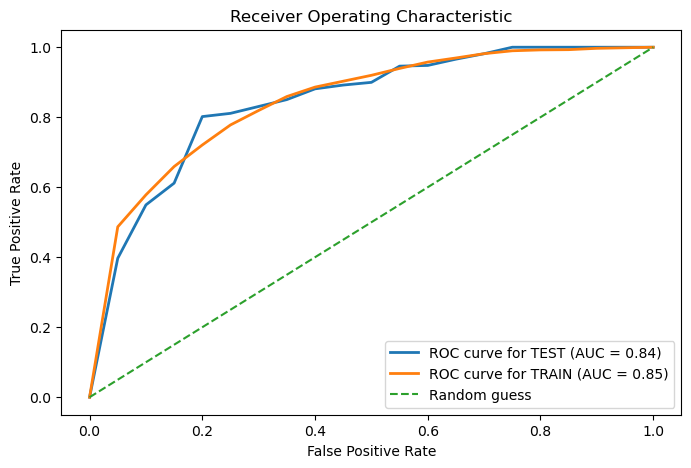

TRAINING classification report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       435
           1       0.78      0.75      0.76       430

    accuracy                           0.77       865
   macro avg       0.77      0.77      0.77       865
weighted avg       0.77      0.77      0.77       865


TESTING classification report: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       106
           1       0.80      0.77      0.79       111

    accuracy                           0.79       217
   macro avg       0.79      0.79      0.79       217
weighted avg       0.79      0.79      0.79       217

Test accuracy: 0.79
>> Test precision: 0.80 <<
Test recall: 0.77
Test F1 score: 0.79
Test AUC score: 0.84


In [81]:
# create the logistic regression model
lr_model = LogisticRegression()

# fit the model on the training data
lr_model.fit(X_train, y_train)

# display ROC curve and classification results
ROC(lr_model,X_train_scaled,X_test_scaled,y_train,y_test)

---
## Support Vector Machine Classifier

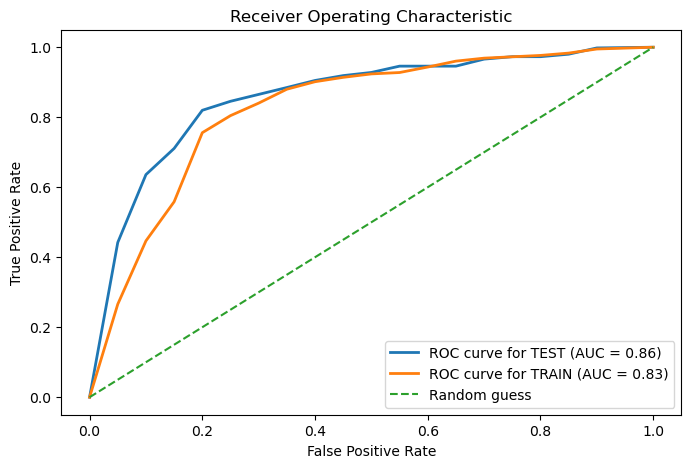

TRAINING classification report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       435
           1       0.77      0.79      0.78       430

    accuracy                           0.78       865
   macro avg       0.78      0.78      0.78       865
weighted avg       0.78      0.78      0.78       865


TESTING classification report: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       106
           1       0.81      0.82      0.81       111

    accuracy                           0.81       217
   macro avg       0.81      0.81      0.81       217
weighted avg       0.81      0.81      0.81       217

Test accuracy: 0.81
>> Test precision: 0.81 <<
Test recall: 0.82
Test F1 score: 0.81
Test AUC score: 0.86


In [82]:
# Create the classifier model
from sklearn.svm import NuSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create NuSVC classifier
svm_model = NuSVC(nu=0.5, probability= True, kernel='rbf')

# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

ROC(svm_model,X_train_scaled, X_test_scaled, y_train, y_test)


---
## xgboost Classifier

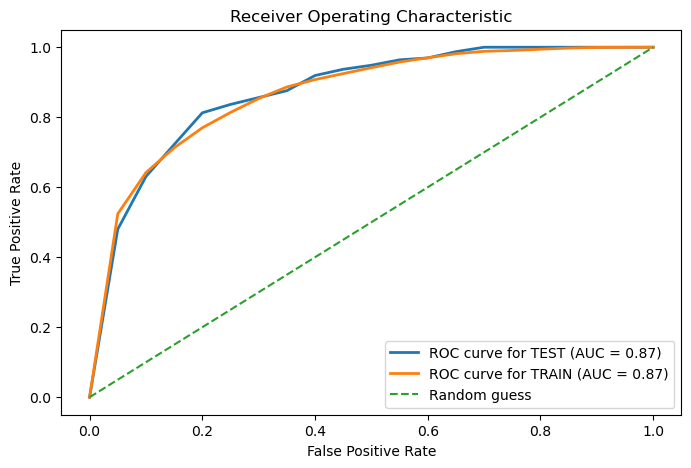

TRAINING classification report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       435
           1       0.77      0.80      0.79       430

    accuracy                           0.78       865
   macro avg       0.78      0.78      0.78       865
weighted avg       0.78      0.78      0.78       865


TESTING classification report: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       106
           1       0.81      0.82      0.81       111

    accuracy                           0.81       217
   macro avg       0.81      0.81      0.81       217
weighted avg       0.81      0.81      0.81       217

Test accuracy: 0.81
>> Test precision: 0.81 <<
Test recall: 0.82
Test F1 score: 0.81
Test AUC score: 0.87


In [83]:
# Create a xgb Classifier model
xgb_clf = xgb.XGBClassifier(reg_alpha=0.25)

xgb_clf.fit(X_train_scaled, y_train)

ROC(xgb_clf,X_train_scaled, X_test_scaled, y_train, y_test)

---
## CATBOOST

0:	learn: 0.6798252	total: 58.3ms	remaining: 43.6s
1:	learn: 0.6670635	total: 59.5ms	remaining: 22.3s
2:	learn: 0.6558174	total: 60.3ms	remaining: 15s
3:	learn: 0.6454795	total: 61.1ms	remaining: 11.4s
4:	learn: 0.6318882	total: 61.9ms	remaining: 9.22s
5:	learn: 0.6209630	total: 62.6ms	remaining: 7.77s
6:	learn: 0.6099370	total: 63.3ms	remaining: 6.71s
7:	learn: 0.6014701	total: 63.6ms	remaining: 5.9s
8:	learn: 0.5917354	total: 64ms	remaining: 5.27s
9:	learn: 0.5842751	total: 64.4ms	remaining: 4.76s
10:	learn: 0.5779608	total: 64.6ms	remaining: 4.34s
11:	learn: 0.5688031	total: 65ms	remaining: 4s
12:	learn: 0.5614947	total: 75.6ms	remaining: 4.29s
13:	learn: 0.5550147	total: 76.6ms	remaining: 4.03s
14:	learn: 0.5504338	total: 77.4ms	remaining: 3.79s
15:	learn: 0.5458298	total: 78.2ms	remaining: 3.58s
16:	learn: 0.5411317	total: 79ms	remaining: 3.4s
17:	learn: 0.5356159	total: 79.8ms	remaining: 3.24s
18:	learn: 0.5314135	total: 80.7ms	remaining: 3.1s
19:	learn: 0.5274471	total: 81.5ms	r

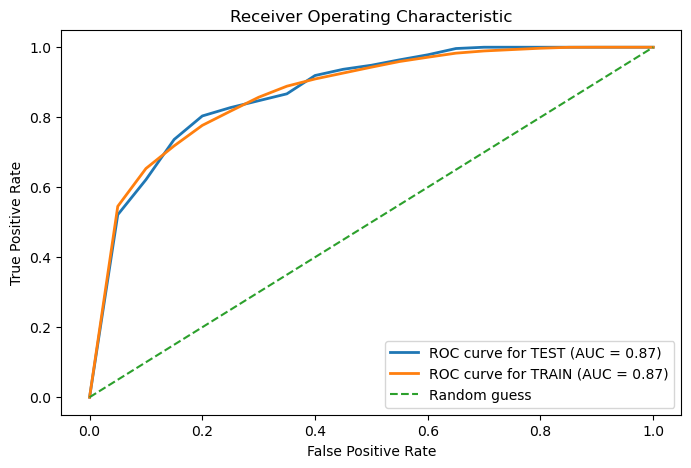

TRAINING classification report: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       435
           1       0.79      0.78      0.79       430

    accuracy                           0.79       865
   macro avg       0.79      0.79      0.79       865
weighted avg       0.79      0.79      0.79       865


TESTING classification report: 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.84      0.77      0.80       111

    accuracy                           0.81       217
   macro avg       0.81      0.81      0.81       217
weighted avg       0.81      0.81      0.81       217

Test accuracy: 0.81
>> Test precision: 0.84 <<
Test recall: 0.77
Test F1 score: 0.81
Test AUC score: 0.87


In [86]:
# Import libraries
from catboost import CatBoostClassifier
# Initialize the CatBoost model

cb_clf = CatBoostClassifier(iterations=750,random_state=seed  ,l2_leaf_reg=3)

# Train the model on the training data
cb_clf.fit(X_train_scaled, y_train)

ROC(cb_clf,X_train_scaled, X_test_scaled, y_train, y_test)

--- 
## Introducing SHAP
SHAP (SHapley Additive exPlanations) is a method for explaining the output of a predictive model by quantifying the contribution of each feature to the final prediction. It can help understanding how the model works and why it makes certain predictions, and confirming some of the trends seen in the Exploratory Data Analysis section.

In [87]:
# define which classifier to use 
clf = cb_clf

# Initialize SHAP explainer
explainer = shap.Explainer(clf.predict, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)


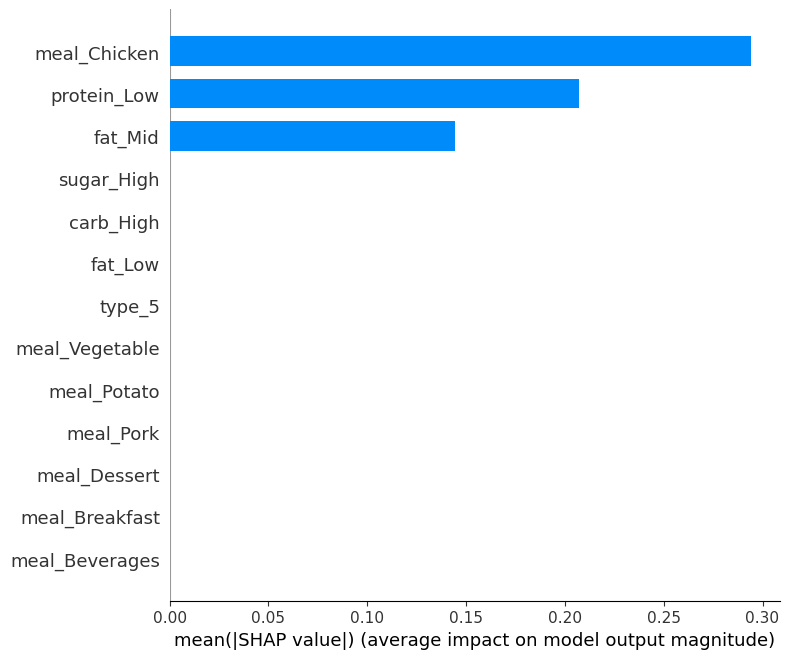

In [88]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


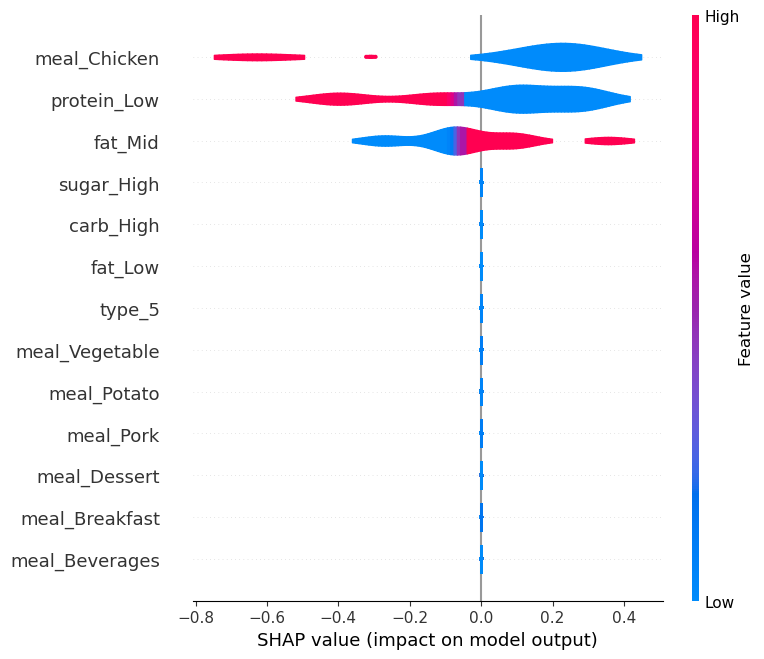

In [89]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test,plot_type='violin')

---
# 5) Conclusions

We demonstrated in this report that any of the 4 following algorithms : CatBoost, XGBoost, SVM or Logistic Regression, can be used to build a predictive model that consistently predicts which recipe will drive high traffic on the website at least 80% of the time.

However, to improve the performance of the model, we recommend the following:

- **Obtain more higher quality data**
	- Web Traffic: to create more precise bins for the target vector "high_traffic," it could be useful to have the exact numbers of visitors per webpage recipe.
	- Missing data: Some missing values were present in the dataset, and we should aim to get a more consistent dataset.
	- Get more recipe specifics data. For example, the fat% was estimated but it should be hard data information that we could get directly from the recipe.
	- Investigate Seasonal behavior in the data: some popular recipes are associated with rich and filling meals that would be suitable for a celebration. Having time-based data will enable us to detect whether a recipe is especially important at a specific time of the year, for instance during Thanksgiving or Holidays celebrations.


- **Improve the feature engineering.**
	- We could have created more mathematical features by adding or multiplying the features between themselves.The PolynomialFeatures python libraries from sci-kit learn could be employed for this purpose. 



- **Improve machine learning models:** 
	- We could use more hyper-parameter tuning to fine tune our models and get an even better performance. Here the only parameter we use was regulation within our tree-based algorithms to ensure we didn't have overfitting. 
	- Add cross-validation to the model: While our models does not present overfitting on the test data we use for this analysis, we could further improve the models' resistance towards overfitting by adding extra steps like cross-validation.

- **Deploy models in production, and implement MLOps**: To ensure that our models keep delivering consistent results, they should be deploy on new data, and we should have a strategy to detects possible drift in the new data provided to us (e.g., a new trend for a specific type of food or an event that wasn't featured in our training data), and adapts our models to keep performing at the desired KPIs targets.

By implementing these recommendations, we can improve the accuracy and reliability of our predictive model and ensure that it continues to perform well over time.